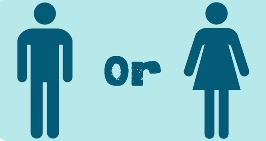

**Dataset Name:** *Gender Classification Dataset*

**Dataset Source:** *Kaggle(https://www.kaggle.com/datasets/elakiricoder/gender-classification-dataset)*

**Dataset Attribute:** *Contain total of 8 attributes, where 7 attributes as independent variables/features and 1 attribute as dependent variable/label/target output*

**Dataset Instances:** *Contain the total of 5001 instances*

This dataset is used to build a BackPropagation Neural Network (BPNN) for binary classification. The purpose of binary classification on the "Gender Classification Dataset" is to predict or classify the gender of individuals based on given features or attributes. The dataset contains various features or characteristics of individuals, such as person has a long hair or not, the width of the forehead from right to left given in cm, the width of the forehead width in cm from where the hair grows to the eyebrows, whether the nose is wide or not, whether the nose is long or not, whether this person has a thin lip or not, and the distance from nose to lip is long. The binary classification task involves training the BPNN model to learn patterns and relationships within the dataset to predict whether an individual is male or female.

STEP 1: RETRIEVED DATASET

In [ ]:
from google.colab import drive
drive.mount('/content/drive')#this command will mount the google drive to access the dataset stored in the cloud


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

df = pd.read_csv('/content/drive/MyDrive/gender_classification_v7.csv')#retrieve dataset from the google drive

In [ ]:
# Use the describe() function to get statistical information about the dataset
dataset_description = df.describe(include='all')

# Print the dataset description
print(dataset_description)

          long_hair  forehead_width_cm  forehead_height_cm    nose_wide  \
count   5001.000000        5001.000000         5001.000000  5001.000000   
unique          NaN                NaN                 NaN          NaN   
top             NaN                NaN                 NaN          NaN   
freq            NaN                NaN                 NaN          NaN   
mean       0.869626          13.181484            5.946311     0.493901   
std        0.336748           1.107128            0.541268     0.500013   
min        0.000000          11.400000            5.100000     0.000000   
25%        1.000000          12.200000            5.500000     0.000000   
50%        1.000000          13.100000            5.900000     0.000000   
75%        1.000000          14.000000            6.400000     1.000000   
max        1.000000          15.500000            7.100000     1.000000   

          nose_long    lips_thin  distance_nose_to_lip_long  gender  
count   5001.000000  5001.000

In [ ]:
df.head(10)#display first 10 entry data of the dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11.8,6.1,1,0,1,1,Male
1,0,14.0,5.4,0,0,1,0,Female
2,0,11.8,6.3,1,1,1,1,Male
3,0,14.4,6.1,0,1,1,1,Male
4,1,13.5,5.9,0,0,0,0,Female
5,1,13.0,6.8,1,1,1,1,Male
6,1,15.3,6.2,1,1,1,0,Male
7,0,13.0,5.2,0,0,0,0,Female
8,1,11.9,5.4,1,0,1,1,Female
9,1,12.1,5.4,0,0,0,0,Female


In [ ]:
df.tail(10)#display the last 10 entry data of the dataset

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
4991,1,12.1,5.8,0,0,0,0,Female
4992,1,14.1,7.0,1,1,1,1,Male
4993,1,11.6,5.9,0,0,0,1,Female
4994,1,12.9,7.0,1,1,1,1,Male
4995,1,12.3,6.9,0,1,1,1,Male
4996,1,13.6,5.1,0,0,0,0,Female
4997,1,11.9,5.4,0,0,0,0,Female
4998,1,12.9,5.7,0,0,0,0,Female
4999,1,13.2,6.2,0,0,0,0,Female
5000,1,15.4,5.4,1,1,1,1,Male


STEP 2:PREPROCESSING

In [ ]:
#check if there is missing value
missing_values = df.isnull().sum()

# Print the count of missing values for each column
print(missing_values)

long_hair                    0
forehead_width_cm            0
forehead_height_cm           0
nose_wide                    0
nose_long                    0
lips_thin                    0
distance_nose_to_lip_long    0
gender                       0
dtype: int64


In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated()

# Print the count of duplicated row
print(duplicate_rows)

0       False
1       False
2       False
3       False
4       False
        ...  
4996     True
4997     True
4998     True
4999     True
5000     True
Length: 5001, dtype: bool


This checks where there is redundant instances(rows) in the dataset. this indicate which rows are considered duplicates based on the comparison. If there are duplicates, can see True values indicating the presence of duplicate rows. If all values are False, it means there are no duplicate rows in the dataset.

In [ ]:
# Remove duplicate rows
df = df.drop_duplicates()

# Check the shape of the DataFrame after removing duplicates
print("Shape after removing duplicates:", df.shape)

Shape after removing duplicates: (3233, 8)


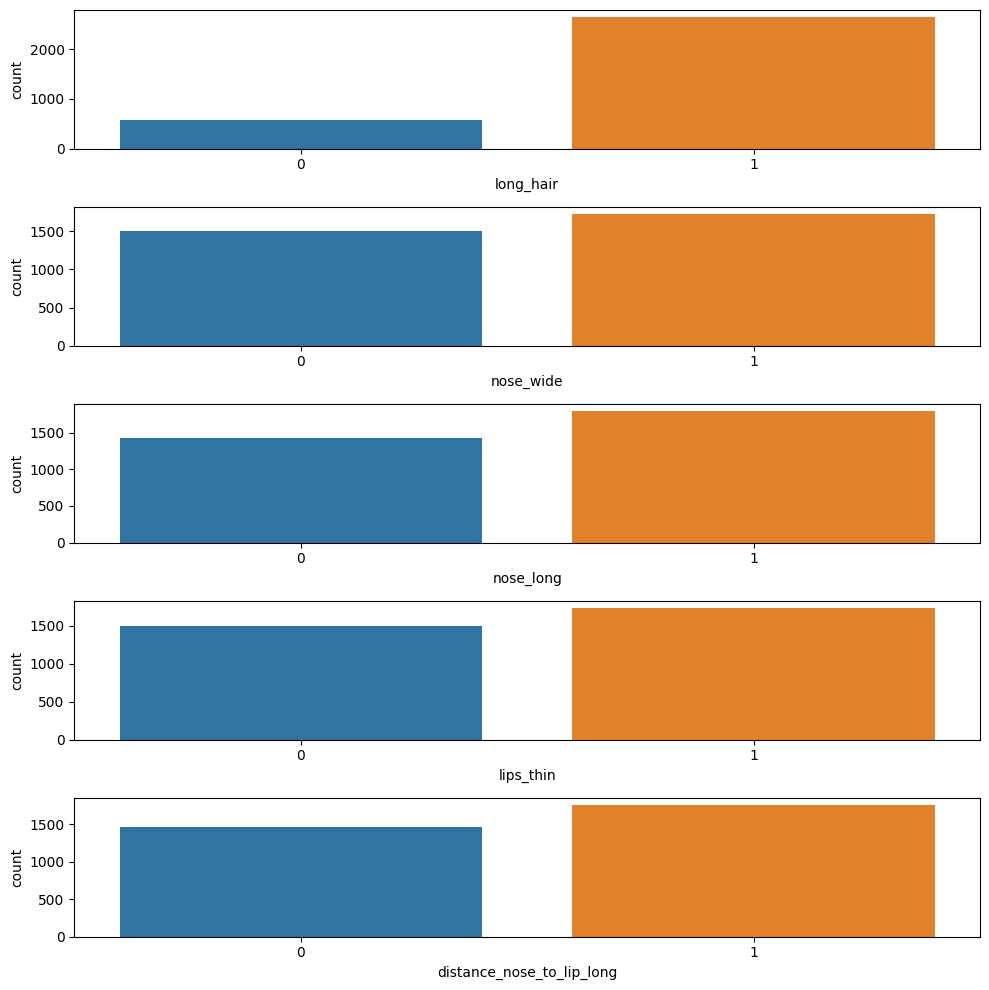

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#dataset has two type of attribute: numerical category data, numerical contunious value

# Plot count plots for categorical attributes/1,0
categorical_attributes = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']
fig, axes = plt.subplots(nrows=len(categorical_attributes), ncols=1, figsize=(10, 10))

for ax, attribute in zip(axes, categorical_attributes):
    sns.countplot(data=df, x=attribute, ax=ax)

plt.tight_layout()
plt.show()

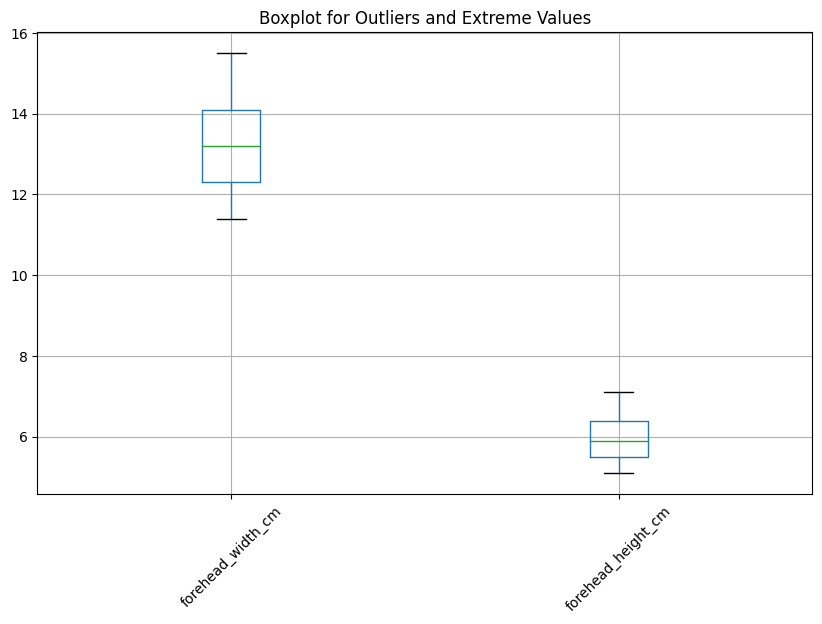

In [ ]:
import matplotlib.pyplot as plt

# Select the columns containing numericcontunious value
numeric_features = df[['forehead_width_cm', 'forehead_height_cm']]

# Create a boxplot for the selected columns/numerical
plt.figure(figsize=(10, 6))
numeric_features.boxplot()
plt.title("Boxplot for Outliers and Extreme Values")
plt.xticks(rotation=45)
plt.show()

Outliers are data points that are significantly different from the rest of the data. In the boxplot, they are represented as points that are located outside the range of most of the data. Extreme values, on the other hand, are the minimum and maximum values of the data that define the range.

In the given boxplot, there are no outliers, but there is an extreme value for the variable "forehead_height_cm" that is located towards the lower end of the data distribution. This suggests that most of the data points are concentrated towards the upper end, and there are relatively few values towards the lower end.

When a distribution is skewed, it means that it is not symmetrical and has a bias towards one side. In this case, the skewness towards the lower end of the distribution can potentially impact the performance of machine learning models, as they may be more sensitive to outliers or extreme values.

To address this issue, one approach is to perform feature scaling using min-max normalization. This rescales the data to a specific range (e.g., between 0 and 1), which can help mitigate the impact of extreme values and ensure that the features are on a similar scale for better model performance.

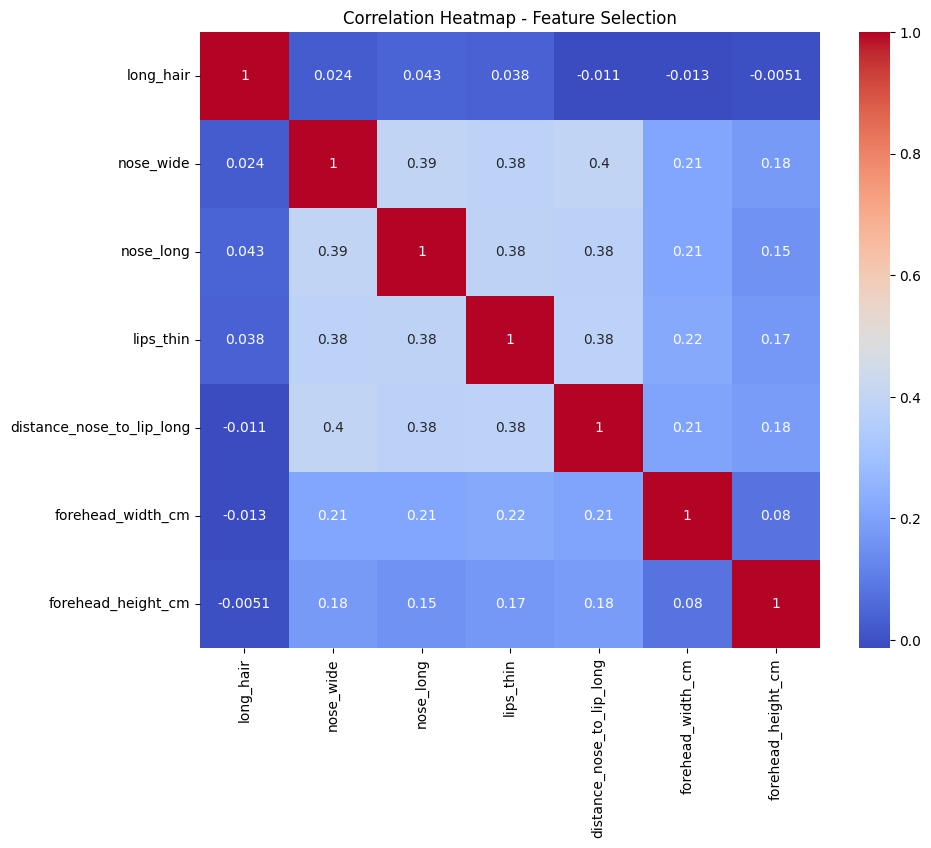

Correlations between different pairs of features:
                           long_hair  nose_wide  nose_long  lips_thin  \
long_hair                   1.000000   0.024123   0.042556   0.037514   
nose_wide                   0.024123   1.000000   0.394605   0.379767   
nose_long                   0.042556   0.394605   1.000000   0.384860   
lips_thin                   0.037514   0.379767   0.384860   1.000000   
distance_nose_to_lip_long  -0.011362   0.395401   0.377462   0.380805   
forehead_width_cm          -0.013151   0.212223   0.212032   0.220566   
forehead_height_cm         -0.005145   0.180526   0.153438   0.170018   

                           distance_nose_to_lip_long  forehead_width_cm  \
long_hair                                  -0.011362          -0.013151   
nose_wide                                   0.395401           0.212223   
nose_long                                   0.377462           0.212032   
lips_thin                                   0.380805           0.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder


# Select the categorical features to be encoded
categorical_features = ['long_hair', 'nose_wide', 'nose_long', 'lips_thin', 'distance_nose_to_lip_long']

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the categorical features
for feature in categorical_features:
    df.loc[:, feature] = label_encoder.fit_transform(df.loc[:, feature])

# Select the features: converted categorical features and original numerical features
features = categorical_features + ['forehead_width_cm', 'forehead_height_cm']
data = df[features]

# Compute the correlation matrix
correlation_matrix = data.corr()

# Create a heatmap for correlation analysis
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap - Feature Selection')
plt.show()


# Analyze the correlations between different pairs of features
feature_correlations = correlation_matrix
print("Correlations between different pairs of features:")
print(feature_correlations)

# Identify strong positive and negative correlations between features
strong_positive_feature_correlations = feature_correlations[feature_correlations > 0.5].stack()
strong_negative_feature_correlations = feature_correlations[feature_correlations < -0.5].stack()
print("Strong positive correlations between features:")
print(strong_positive_feature_correlations)
print("Strong negative correlations between features:")
print(strong_negative_feature_correlations)


#just for feature, or for label also??





The correlation matrix provides insights into the relationships between different pairs of features. Each cell in the matrix represents the correlation coefficient, which ranges from -1 to 1. A value of 1 indicates a strong positive correlation, -1 indicates a strong negative correlation, and 0 indicates no correlation.

In our case, we observe that there are no strong negative correlations between any pairs of features. This means that there are no features that have a strong inverse relationship with each other.

On the other hand, we see some strong positive correlations between certain feature pairs. This suggests that these features tend to move together in the same direction. For instance, 'nose_wide' and 'nose_long' have a correlation coefficient of 0.394605, indicating a positive correlation between them.

Additionally, the diagonal values represent the strong positive correlations between each feature and itself. This is expected since a feature is perfectly correlated with itself.

Based on this information, We can choose to include all the features since they do not exhibit strong negative correlations with each other.

STEP 4: FEATURE SELECTION

In [ ]:
# Define the threshold for feature selection
threshold = 0.5

# Select features with correlation coefficient above the threshold
selected_features = correlation_matrix[abs(correlation_matrix) > threshold].index

# Create a new DataFrame with selected features
df_selected = df[selected_features]

# Print the selected features
print("Selected Features:")
print(df_selected.columns)

Selected Features:
Index(['long_hair', 'nose_wide', 'nose_long', 'lips_thin',
       'distance_nose_to_lip_long', 'forehead_width_cm', 'forehead_height_cm'],
      dtype='object')


The selected features are determined based on their correlation coefficients, which measure the strength of their linear relationship with other variables. In this case, the threshold for selecting features is set at 0.5, meaning that only features with correlation coefficients higher than this value are chosen.

By selecting features with higher correlation coefficients, you are prioritizing those that show stronger associations with other variables in the dataset. This helps in identifying the most influential features and understanding their relationships with the target variable or other relevant features.

Based on this approach, it appears that all the original features are selected, indicating that they all have significant correlations with the other variables. Therefore, there is no removal of irrelevant data in this feature selection process.

STEP 7: INITIALIZE BPNN PARAMETER

In [ ]:
df.info(10)# show the attribute datatype

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3233 entries, 0 to 4995
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   long_hair                  3233 non-null   int64  
 1   forehead_width_cm          3233 non-null   float64
 2   forehead_height_cm         3233 non-null   float64
 3   nose_wide                  3233 non-null   int64  
 4   nose_long                  3233 non-null   int64  
 5   lips_thin                  3233 non-null   int64  
 6   distance_nose_to_lip_long  3233 non-null   int64  
 7   gender                     3233 non-null   object 
dtypes: float64(2), int64(5), object(1)
memory usage: 227.3+ KB


The purpose of this is to obtain a summary of the dataset, specifically the datatypes of each attribute or column. This summary allows us to see the types of data stored in the dataset, such as numerical, categorical, or textual.

By examining the datatypes, we can identify attributes that are not of integer type. In this case, we can see that the attributes forehead_width_cm and forehead_height_cm are of float type, while the gender attribute is of object type. This information is important because before feeding the data into a neural network, we need to ensure that all attributes are converted to numeric format, as neural networks can only process numeric data.

Understanding the datatypes helps us prepare and preprocess the data appropriately, ensuring that it is in a suitable format for further analysis or machine learning tasks.

In [ ]:
#convert the non-numerical data to numeric data
#crucial to set all data to numeric as the model only accept numerical data
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()

df['gender'] = label_encoder.fit_transform(df['gender'])
df['forehead_width_cm'] = df['forehead_width_cm'].astype(int)
df['forehead_height_cm'] = df['forehead_height_cm'].astype(int)

df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11,6,1,0,1,1,1
1,0,14,5,0,0,1,0,0
2,0,11,6,1,1,1,1,1
3,0,14,6,0,1,1,1,1
4,1,13,5,0,0,0,0,0
5,1,13,6,1,1,1,1,1
6,1,15,6,1,1,1,0,1
7,0,13,5,0,0,0,0,0
8,1,11,5,1,0,1,1,0
9,1,12,5,0,0,0,0,0


The code is making changes to the dataset to prepare it for analysis with machine learning models. It is converting non-numerical data to numerical data because most machine learning models require numerical input.

In particular, the 'gender' column is being transformed using label encoding. This means that each unique category in the 'gender' column is assigned a specific number where male is 1 and female is 0. This conversion allows the machine learning model to understand and work with the gender values as numbers instead of text or categories.

Additionally, the 'forehead_width_cm' and 'forehead_height_cm' columns are being converted from floating-point numbers to integers. This adjustment ensures that the values in these columns are treated as whole numbers, which is often more appropriate for certain types of analyses.

The outcome of this code is a modified dataset where the 'gender', 'forehead_width_cm', and 'forehead_height_cm' columns have been transformed into numerical data types. The 'gender' column now contains encoded numerical values, while the 'forehead_width_cm' and 'forehead_height_cm' columns contain whole numbers. These modifications enable the dataset to be effectively processed and used for machine learning purposes.

In [ ]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# 75% of the data is selected
train_df = df.sample(frac=0.75, random_state=4)

# it drops the training data
# from the original dataframe
test_df = df.drop(train_df.index)

#techniques use : percentage split,not k fold



TensorFlow version: 2.12.0


The code is dividing the dataset into two parts: a training subset and a testing subset. This division is done to separate the data used for training a machine learning model from the data used for evaluating its performance.

In this case, 75% of the data is randomly selected to create the training dataset, while the remaining 25% is used for the testing dataset. The random selection ensures that the training and testing subsets are representative of the overall dataset.

By splitting the data in this way, we can use the training subset to teach the machine learning model patterns and relationships in the data. Then, we can assess the model's ability to generalize to new, unseen data by evaluating its performance on the testing subset.

This technique of splitting the data into training and testing subsets is known as a percentage split. It allows us to estimate how well the model is likely to perform on new data and helps us make decisions about its effectiveness and potential for deployment in real-world scenarios.

In [ ]:
train_df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
2474,1,13,5,1,0,1,1,1
2819,0,14,7,1,1,1,0,1
921,1,13,5,0,0,0,1,0
4632,0,13,6,0,0,1,0,0
928,1,12,6,1,1,1,1,1
3451,0,12,6,0,0,0,0,0
3649,1,11,6,1,0,0,0,0
1304,1,14,6,1,1,1,1,1
3152,1,11,6,0,0,1,1,1
4148,1,11,6,0,0,0,0,0


In [ ]:
test_df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1,11,6,1,0,1,1,1
1,0,14,5,0,0,1,0,0
6,1,15,6,1,1,1,0,1
9,1,12,5,0,0,0,0,0
12,0,14,5,1,1,1,1,1
16,1,15,6,1,1,1,1,1
18,1,11,5,0,0,0,0,0
22,1,12,6,1,0,0,1,0
23,0,12,6,1,1,0,1,1
32,1,11,5,1,0,0,0,0


In [ ]:
#min-max normalization
# calling to (0,1) range
max_train = train_df.max(axis= 0)
min_train = train_df.min(axis= 0)
max_test =  test_df.max(axis= 0)
min_test =  test_df.min(axis= 0)


range_train = max_train - min_train
train_df = (train_df - min_train)/(range_train)

range_test = max_test - min_test
test_df = (test_df - min_test)/(range_test)



#display 75% of dataset, feature and label/targeted output
train_df.shape


(2425, 8)

The code is performing min-max normalization on the training and testing datasets. Min-max normalization is a technique used to rescale numeric data so that it falls within a specific range, typically between 0 and 1. This normalization is done to ensure that all features have a similar scale and to prevent any particular feature from dominating the learning process.

First, the code calculates the maximum and minimum values for each feature separately in the training and testing datasets. These values represent the range of each feature.

Then, the range of each feature is used to normalize the corresponding feature values in both the training and testing datasets. This is done by subtracting the minimum value from each feature value and dividing the result by the range. This mapping ensures that the values are proportionally adjusted within the (0, 1) range.

The outcome of this code is that the feature values in both the training and testing datasets are rescaled to the (0, 1) range. This rescaling helps maintain the relative relationships between the values and ensures that they are on a similar scale.

In [ ]:
test_df.shape

(808, 8)

In [ ]:
test_df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
0,1.0,0.00,0.5,1.0,0.0,1.0,1.0,1.0
1,0.0,0.75,0.0,0.0,0.0,1.0,0.0,0.0
6,1.0,1.00,0.5,1.0,1.0,1.0,0.0,1.0
9,1.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,0.75,0.0,1.0,1.0,1.0,1.0,1.0
16,1.0,1.00,0.5,1.0,1.0,1.0,1.0,1.0
18,1.0,0.00,0.0,0.0,0.0,0.0,0.0,0.0
22,1.0,0.25,0.5,1.0,0.0,0.0,1.0,0.0
23,0.0,0.25,0.5,1.0,1.0,0.0,1.0,1.0
32,1.0,0.00,0.0,1.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
2474,1.0,0.50,0.0,1.0,0.0,1.0,1.0,1.0
2819,0.0,0.75,1.0,1.0,1.0,1.0,0.0,1.0
921,1.0,0.50,0.0,0.0,0.0,0.0,1.0,0.0
4632,0.0,0.50,0.5,0.0,0.0,1.0,0.0,0.0
928,1.0,0.25,0.5,1.0,1.0,1.0,1.0,1.0
3451,0.0,0.25,0.5,0.0,0.0,0.0,0.0,0.0
3649,1.0,0.00,0.5,1.0,0.0,0.0,0.0,0.0
1304,1.0,0.75,0.5,1.0,1.0,1.0,1.0,1.0
3152,1.0,0.00,0.5,0.0,0.0,1.0,1.0,1.0
4148,1.0,0.00,0.5,0.0,0.0,0.0,0.0,0.0


In [ ]:
train_df.tail(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long,gender
180,1.0,0.50,0.5,0.0,0.0,0.0,0.0,0.0
3911,1.0,0.50,0.5,0.0,1.0,0.0,1.0,0.0
1667,1.0,0.75,0.0,1.0,1.0,1.0,1.0,1.0
2653,0.0,0.25,0.0,0.0,0.0,0.0,1.0,0.0
1441,1.0,0.50,0.0,1.0,0.0,1.0,1.0,1.0
205,1.0,0.25,0.5,1.0,1.0,1.0,1.0,1.0
4737,0.0,0.25,0.0,0.0,0.0,0.0,0.0,0.0
2486,1.0,0.50,0.0,1.0,1.0,1.0,1.0,1.0
4356,1.0,0.50,0.5,0.0,1.0,0.0,0.0,0.0
1973,1.0,0.50,0.0,1.0,1.0,1.0,1.0,1.0


In [ ]:
# now let's separate the targets and labels
X_train = train_df.drop('gender',axis=1)
X_val = test_df.drop('gender',axis=1)
y_train = train_df['gender']
y_val = test_df['gender']

The code is splitting the data into two sets: one for training the machine learning model and another for evaluating its performance.

For the training set, the code creates two datasets: X_train and y_train. X_train contains the feature values, which are the attributes used to make predictions. It excludes the 'gender' column as it is the target variable. The y_train dataset contains the corresponding target values, which in this case is the gender. These datasets will be used to train the model on known data.

For the validation set, the code creates two datasets: X_val and y_val. X_val contains the feature values for validation, which is a separate set of data used to evaluate the model's performance on unseen data. Similar to the training set, the 'gender' column is dropped from X_val. The y_val dataset contains the corresponding target values for validation.

The purpose of splitting the data into training and validation sets is to assess how well the model generalizes to new, unseen data. By training the model on one set of data and evaluating it on another, we can check if the model has learned patterns and can make accurate predictions on data it has not encountered before.

In summary, this code separates the data into features and target variables for training and validation, allowing us to train and evaluate the machine learning model effectively.

In [ ]:
X_train.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
2474,1.0,0.50,0.0,1.0,0.0,1.0,1.0
2819,0.0,0.75,1.0,1.0,1.0,1.0,0.0
921,1.0,0.50,0.0,0.0,0.0,0.0,1.0
4632,0.0,0.50,0.5,0.0,0.0,1.0,0.0
928,1.0,0.25,0.5,1.0,1.0,1.0,1.0
3451,0.0,0.25,0.5,0.0,0.0,0.0,0.0
3649,1.0,0.00,0.5,1.0,0.0,0.0,0.0
1304,1.0,0.75,0.5,1.0,1.0,1.0,1.0
3152,1.0,0.00,0.5,0.0,0.0,1.0,1.0
4148,1.0,0.00,0.5,0.0,0.0,0.0,0.0


In [ ]:
X_val.head(10)

,long_hair,forehead_width_cm,forehead_height_cm,nose_wide,nose_long,lips_thin,distance_nose_to_lip_long
0,1.0,0.00,0.5,1.0,0.0,1.0,1.0
1,0.0,0.75,0.0,0.0,0.0,1.0,0.0
6,1.0,1.00,0.5,1.0,1.0,1.0,0.0
9,1.0,0.25,0.0,0.0,0.0,0.0,0.0
12,0.0,0.75,0.0,1.0,1.0,1.0,1.0
16,1.0,1.00,0.5,1.0,1.0,1.0,1.0
18,1.0,0.00,0.0,0.0,0.0,0.0,0.0
22,1.0,0.25,0.5,1.0,0.0,0.0,1.0
23,0.0,0.25,0.5,1.0,1.0,0.0,1.0
32,1.0,0.00,0.0,1.0,0.0,0.0,0.0


In [ ]:
y_train.head()


2474    1.0
2819    1.0
921     0.0
4632    0.0
928     1.0
Name: gender, dtype: float64

In [ ]:
# We'll need to pass the shape
# of features/inputs as an argument
# in our model, so let's define a variable
# to save it.
input_shape = [X_train.shape[1]]

input_shape

[7]

The code is determining the shape of the input data that will be used to train the model. It finds the number of features (columns) in the X_train dataset and saves it as the "input_shape" variable.

The "input_shape" represents the dimensions of the input data that the model expects during training. It is important to specify the input shape correctly so that the model can allocate the right amount of resources and perform the necessary computations.

By knowing the input shape, the model can understand the structure of the data and make appropriate adjustments to learn and make predictions effectively.

In [ ]:
model1 = tf.keras.Sequential([

    tf.keras.layers.InputLayer(input_shape=input_shape),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units= 1, activation = 'sigmoid')
])
model1.summary()

Model: "sequential_39"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_123 (Dense)           (None, 64)                512       
                                                                 
 dense_124 (Dense)           (None, 64)                4160      
                                                                 
 dense_125 (Dense)           (None, 1)                 65        
                                                                 
Total params: 4,737
Trainable params: 4,737
Non-trainable params: 0
_________________________________________________________________


a Sequential model is created using TensorFlow's Keras API. The model consists of four Dense layers.

the first Dense Layer acts as an input layer.It also specifies the input_shape parameter, which defines the shape of the input data. The input_shape should be a tuple indicating the number of features in a single data sample

The second Dense layer has 64 units of neuron and uses the ReLU activation function. This layer serves as the first Hidden layer of the model.This layer is fully connected to the previous layer, allowing information to flow from all the neurons in the previous layer to each neuron in this layer.

The third Dense layer also has 64 units of neuron and uses the ReLU activation function.  This layer serves as the second Hidden layer of the model. This layer is fully connected to the previous layer, allowing information to flow from all the neurons in the previous layer to each neuron in this layer.

The fourh Dense layer has 1 unit of neuron and uses the sigmoid activation function. This layer serves as the output layer of the model. The sigmoid activation function squashes the output between 0 and 1, making it suitable for binary classification problems.

Calling model.summary() will display a summary of the model architecture, showing the number of parameters in each layer and the total number of parameters in the model. The summary provides insights into the model's structure, the number of trainable parameters, and the flow of information through the layers. It helps in understanding the model's complexity and can be useful for debugging and optimizing the model.

STEP 8: RUN BPNN

In [ ]:
from sklearn.metrics import accuracy_score
optimizer1 = tf.keras.optimizers.Adam(learning_rate=0.001)  # Specify the learning rate

model1.compile(optimizer=optimizer1,

              loss='binary_crossentropy',
              metrics=['accuracy']
              )

batch_size1=256
epochs1=15
losses1 = model1.fit(X_train, y_train,

                   validation_data=(X_val, y_val),

                   # it will use 'batch_size' number
                   # of examples per example
                   batch_size=batch_size1,
                   epochs=epochs1 # total epoch


                   )

Epoch 1/15
10/10 [==============================] - 5s 84ms/step - loss: 0.7070 - accuracy: 0.3918 - val_loss: 0.6488 - val_accuracy: 0.5495
Epoch 2/15
10/10 [==============================] - 0s 15ms/step - loss: 0.6022 - accuracy: 0.5670 - val_loss: 0.5660 - val_accuracy: 0.6807
Epoch 3/15
10/10 [==============================] - 0s 12ms/step - loss: 0.5141 - accuracy: 0.7744 - val_loss: 0.4806 - val_accuracy: 0.7995
Epoch 4/15
10/10 [==============================] - 0s 15ms/step - loss: 0.4272 - accuracy: 0.8507 - val_loss: 0.3919 - val_accuracy: 0.9047
Epoch 5/15
10/10 [==============================] - 0s 11ms/step - loss: 0.3414 - accuracy: 0.9192 - val_loss: 0.3090 - val_accuracy: 0.9084
Epoch 6/15
10/10 [==============================] - 0s 11ms/step - loss: 0.2689 - accuracy: 0.9237 - val_loss: 0.2436 - val_accuracy: 0.9183
Epoch 7/15
10/10 [==============================] - 0s 11ms/step - loss: 0.2174 - accuracy: 0.9262 - val_loss: 0.1982 - val_accuracy: 0.9257
Epoch 8/15
10

In supervised learning, both the input features (X) and the corresponding labels (y) are used to train and evaluate the model. During training, the model learns to make predictions based on the input features and adjusts its parameters to minimize the discrepancy between the predicted outputs and the true labels.

For model evaluation, it is essential to provide the labels (y) for the validation data. The model needs the labels to compute the loss and accuracy metrics on the validation data during training. This allows you to assess how well the model is generalizing to unseen examples and make any necessary adjustments to improve its performance.

Percentage Split: Percentage split involves randomly dividing the data into a training set and a testing set based on a specified percentage. The training set is used to train the model, and the testing set is used to evaluate its performance. Common percentages include 70/30, 80/20, or 90/10 for training/testing splits.

Training Set: The larger portion of the data used for training the model, typically around 70-90% of the data.

Testing Set: The smaller portion of the data used for evaluating the model's performance, typically around 10-30% of the data.

Percentage Split: Percentage split can be used when the dataset is large enough, and there is less concern about the variability in performance. It is simpler to implement and computationally less expensive than cross-validation. However, it may lead to a less reliable performance estimate, especially when the dataset is small or imbalanced.

In the context of training a neural network, the batch size refers to the number of samples or data points that are processed by the model in each iteration of a single epoch. An epoch, on the other hand, is a complete pass through the entire training dataset.

When training a neural network, the data is usually divided into batches, and the model updates its weights after processing each batch. The batch size parameter determines how many samples are included in each batch. Here's why the batch size is important:

Memory Efficiency: By using batches, the model doesn't need to load the entire dataset into memory at once. This is especially useful when dealing with large datasets that may not fit entirely in memory. The batch size allows you to control how much memory is used during training.

Computational Efficiency: Training a neural network can be computationally expensive, especially for large models and datasets. By using batches, the model can take advantage of parallel computing architectures (such as GPUs) to process multiple samples simultaneously. This speeds up the training process compared to processing one sample at a time.

Generalization and Optimization: The batch size also affects the model's generalization and optimization capabilities. A larger batch size provides a smoother gradient estimate since it incorporates more information about the data distribution. This can lead to faster convergence and more stable updates of the model's weights. However, using a smaller batch size can introduce more stochasticity into the training process, which can help the model generalize better and escape local optima.

Choosing an appropriate batch size depends on several factors, including the available memory, computational resources, and the specific problem you're solving. Common batch sizes range from 32 to 128, but larger or smaller sizes can also be used depending on the specific scenario.

It's worth noting that the batch size is just one of the hyperparameters that need to be tuned during the training process. Other hyperparameters, such as learning rate, number of epochs, and network architecture, also play important roles in achieving good performance and convergence of the model.

STEP 9: EVALUATION METRIC

In [ ]:
# Get the predicted probabilities
predictions1 = model1.predict(X_val)

# Apply threshold of 0.5 to get binary predictions
#The threshold of 0.5 is commonly used in binary classification problems to classify instances as either positive (1) or negative (0) based on the predicted probabilities. If the predicted probability is greater than or equal to 0.5, it is classified as 1; otherwise, it is classified as 0.
binary_predictions1 = [1.0 if pred >= 0.5 else 0.0 for pred in predictions1]

# Display the binary predictions
print(binary_predictions1)


26/26 [==============================] - 0s 3ms/step
[1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0.0, 0.0, 1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 0

After training the model, you can use the model.predict() function to obtain the predicted probabilities for the validation data (X_val). These predicted probabilities represent the model's confidence in assigning each instance to the positive class (1) or the negative class (0).

However, to evaluate the model's performance and compare the predictions with the actual labels, you should use both the input features (X_val) and the corresponding labels (y_val).


In [ ]:
# Slice the arrays for the first ten rows
y_val_subset1 = y_val[:10]
binary_predictions_subset1 = binary_predictions1[:10]

# Calculate error for the first three rows
error1 = abs(y_val_subset1.values - binary_predictions_subset1)

# Display expected, actual, predicted values, and error for the first ten rows
print("Expected:")
print(y_val_subset1)
print("Actual:", y_val_subset1.values)
print("Predicted:", binary_predictions_subset1)
print("Error:", error1)

Expected:
0     1.0
1     0.0
6     1.0
9     0.0
12    1.0
16    1.0
18    0.0
22    0.0
23    1.0
32    0.0
Name: gender, dtype: float64
Actual: [1. 0. 1. 0. 1. 1. 0. 0. 1. 0.]
Predicted: [1.0, 0.0, 1.0, 0.0, 1.0, 1.0, 0.0, 1.0, 1.0, 0.0]
Error: [0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


The code is evaluating the model's predictions by comparing them with the actual values for a subset of the validation data. It selects the first ten rows of the predicted values and actual values.

Then, it calculates the error by finding the absolute difference between the predicted and actual values. This gives us a measure of how much the model's predictions differ from the true values.

Finally, it displays the expected (actual) values, the actual values themselves, the predicted values, and the corresponding error for the first ten rows. This allows us to visually compare the predicted and actual values and see how accurate the model's predictions are.

By examining the outcome, we can gain insights into the performance of the model on this subset of the validation data and understand how well it is predicting the target variable.

In [ ]:
# Evaluate accuracy on training data
train_predictions1 = model1.predict(X_train)
train_predictions1 = [1 if pred >= 0.5 else 0 for pred in train_predictions1]
train_accuracy1 = accuracy_score(y_train, train_predictions1) * 100
train_error1 = 100 - train_accuracy1  # Calculate training error
print("Training Accuracy Model 1: {:.2f}%".format(train_accuracy1))
print("Training Error Model 1: {:.2f}%".format(train_error1))

# Evaluate accuracy on test data
test_predictions1 = model1.predict(X_val)
test_predictions1 = [1 if pred >= 0.5 else 0 for pred in test_predictions1]
test_accuracy1 = accuracy_score(y_val, test_predictions1) * 100
test_error1 = 100 - test_accuracy1  # Calculate test error
print("Test Accuracy Model 1: {:.2f}%".format(test_accuracy1))
print("Test Error Model 1: {:.2f}%".format(test_error1))

76/76 [==============================] - 0s 3ms/step
Training Accuracy Model 1: 95.18%
Training Error Model 1: 4.82%
26/26 [==============================] - 0s 4ms/step
Test Accuracy Model 1: 94.06%
Test Error Model 1: 5.94%


the training accuracy and test accuracy above show the model is not overfitting

Overfitting occurs when a machine learning model performs very well on the training data but fails to generalize well to unseen data or new examples. It happens when the model learns the specific patterns and noise in the training data to the extent that it becomes overly specialized and fails to capture the underlying general patterns in the data.

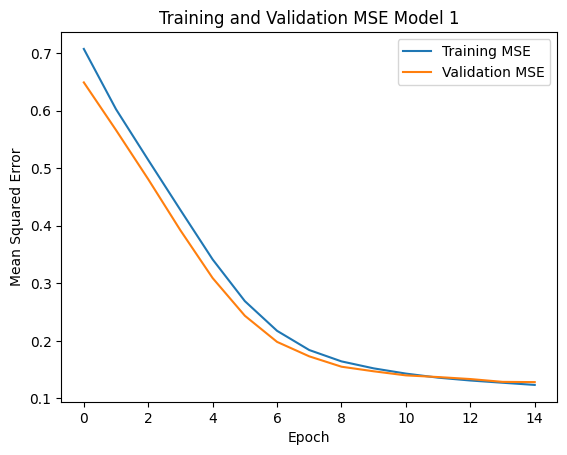

In [ ]:
mse_df1 = pd.DataFrame(losses1.history)

# mse_df is a dataframe which
# contains the loss and val_loss
# in each epoch

mse_df1.loc[:, ['loss', 'val_loss']].plot()

plt.xlabel('Epoch')
plt.ylabel('Mean Squared Error')
plt.title('Training and Validation MSE Model 1')
plt.legend(['Training MSE', 'Validation MSE'])
plt.show()


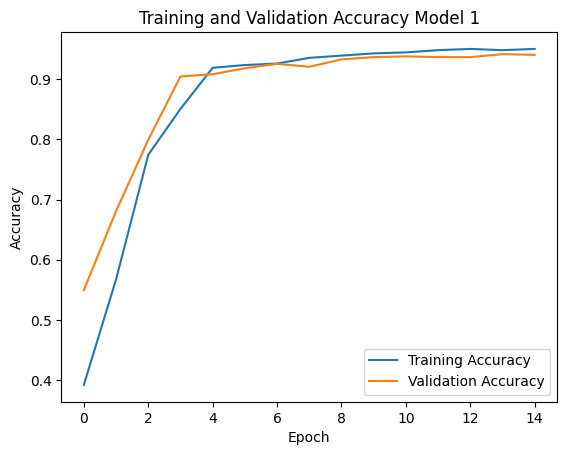

In [ ]:
accuracy_df1 = pd.DataFrame(losses1.history)

# accuracy_df is a dataframe which
# contains the accuracy and val_accuracy
# in each epoch
accuracy_df1.loc[:, ['accuracy', 'val_accuracy']].plot()

plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy Model 1')
plt.legend(['Training Accuracy', 'Validation Accuracy'])
plt.show()

STEP 10:CONFUSION MATRIX

In [ ]:
from sklearn.metrics import confusion_matrix

# Define class labels
class_labels1 = ["female", "male"]

# Get the predicted labels
predicted_labels1 = model1.predict(X_val)
predicted_labels1 = [1 if pred >= 0.5 else 0 for pred in predicted_labels1]

# Create the confusion matrix
cm1= confusion_matrix(y_val, predicted_labels1)

# Extract TP, TN, FP, FN counts
TN1 = cm1[0, 0]
FP1 = cm1[0, 1]
FN1= cm1[1, 0]
TP1 = cm1[1, 1]

# Calculate precision
precision1 = TP1 / (TP1 + FP1)

# Calculate recall
recall1 = TP1 / (TP1 + FN1)

# Display the counts
print("True Positives (TP):", TP1)
print("True Negatives (TN):", TN1)
print("False Positives (FP):", FP1)
print("False Negatives (FN):", FN1)

print("")
print("Precision:", precision1)
print("Recall:", recall1)

print("")
cm_df1 = pd.DataFrame(cm1, index=class_labels1, columns=class_labels1)
print("Confusion Matrix:\n")
print(cm_df1)

26/26 [==============================] - 0s 1ms/step
True Positives (TP): 413
True Negatives (TN): 347
False Positives (FP): 27
False Negatives (FN): 21

Precision: 0.9386363636363636
Recall: 0.9516129032258065

Confusion Matrix:

        female  male
female     347    27
male        21   413


The code evaluates the model's performance by calculating several metrics using a confusion matrix.

Here's what each outcome means:

-True Positives (TP): This represents the number of instances correctly predicted as positive (in this case, correctly predicted as male).
-True Negatives (TN): This represents the number of instances correctly predicted as negative (in this case, correctly predicted as female).
-False Positives (FP): This represents the number of instances incorrectly predicted as positive (in this case, incorrectly predicted as male when the actual label is female).
-False Negatives (FN): This represents the number of instances incorrectly predicted as negative (in this case, incorrectly predicted as female when the actual label is male).

Precision: It measures the model's accuracy in predicting positive instances (male) among all instances predicted as positive (both true positives and false positives). It is calculated as TP / (TP + FP).

Recall: It measures the model's ability to correctly identify all positive instances (male) among all actual positive instances (both true positives and false negatives). It is calculated as TP / (TP + FN).

Confusion Matrix: It provides a comprehensive view of the model's predictions compared to the actual labels. It shows the counts of true positives, true negatives, false positives, and false negatives. Rows represent the actual labels, and columns represent the predicted labels. It helps assess the model's performance in distinguishing between different classes.

By examining these outcomes, we can evaluate the model's performance in terms of correctly predicting positive and negative instances and understand how well it balances precision and recall. The confusion matrix offers a detailed breakdown of the model's predictions, enabling an analysis of its performance across different class labels.

STEP 11:compare different model with different parameter at least three different model

Number of Hidden Layers : Handled by Hafiz

Number of Units in Hidden Layers: Handled by Adib

Activation Hidden Layer Functions: Handled by Paan

Learning Rate: Handled by Afifi

Batch Size: Handled by Darwish

Number of Epochs: Handled by  Ilham

EXPERIMENT OF 3 DIFFERENT NUMBER OF HIDDEN LAYER USING THE SAME MODEL : HAFIZ

NUMBER OF HIDDEN LAYER PARAMETER: (2, 3, 4)

Number of Hidden Layers: 2

Epoch 1/15
10/10 [==============================] - 1s 29ms/step - loss: 0.6092 - accuracy: 0.6054 - val_loss: 0.5539 - val_accuracy: 0.6770
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 0.4957 - accuracy: 0.7790 - val_loss: 0.4424 - val_accuracy: 0.8205
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 0.3814 - accuracy: 0.8784 - val_loss: 0.3232 - val_accuracy: 0.9134
Epoch 4/15
10/10 [==============================] - 0s 11ms/step - loss: 0.2735 - accuracy: 0.9258 - val_loss: 0.2219 - val_accuracy: 0.9282
Epoch 5/15
10/10 [==============================] - 0s 11ms/step - loss: 0.1934 - accuracy: 0.9357 - val_loss: 0.1653 - val_accuracy: 0.9282
Epoch 6/15
10/10 [==============================] - 0s 13ms/step - loss: 0.1505 - accuracy: 0.9423 - val_loss: 0.1419 - val_accuracy: 0.9356
Epoch 7/15
10/10 [==============================] - 0s 12ms/step - loss: 0.1336 - accuracy: 0.9468 - val_loss: 0.1342 - val_acc

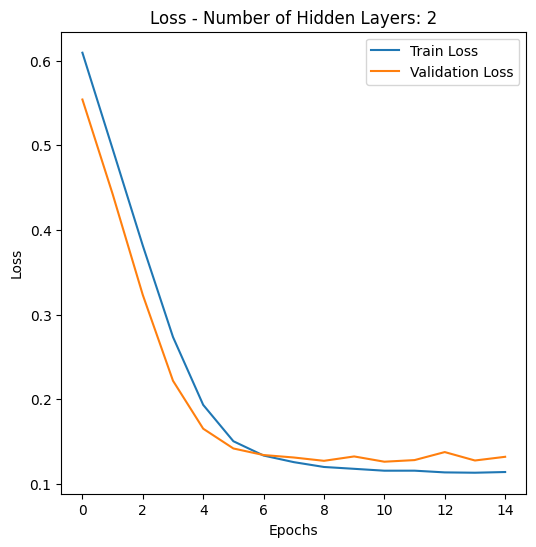

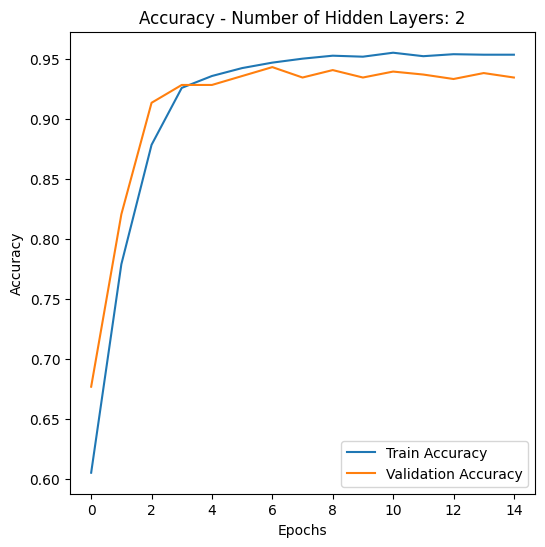


Training Accuracy: 95.34% - Training Error: 4.66%
Testing Accuracy: 93.44% - Testing Error: 6.56%

26/26 [==============================] - 0s 2ms/step

True Positives (TP): 415
True Negatives (TN): 340
False Positives (FP): 34
False Negatives (FN): 19

Confusion Matrix:
        female  male
female     340    34
male        19   415
-------------------------

Number of Hidden Layers: 3

Epoch 1/15
10/10 [==============================] - 2s 28ms/step - loss: 0.6870 - accuracy: 0.6033 - val_loss: 0.6216 - val_accuracy: 0.6757
Epoch 2/15
10/10 [==============================] - 0s 10ms/step - loss: 0.5613 - accuracy: 0.7720 - val_loss: 0.4845 - val_accuracy: 0.8960
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 0.3927 - accuracy: 0.9332 - val_loss: 0.2902 - val_accuracy: 0.9245
Epoch 4/15
10/10 [==============================] - 0s 8ms/step - loss: 0.2185 - accuracy: 0.9398 - val_loss: 0.1614 - val_accuracy: 0.9381
Epoch 5/15
10/10 [=============================

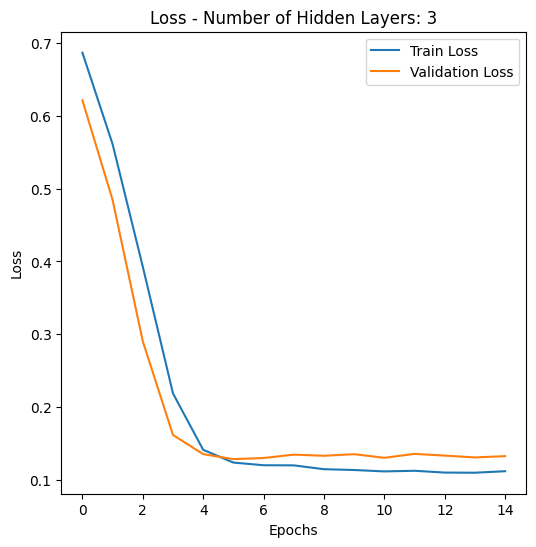

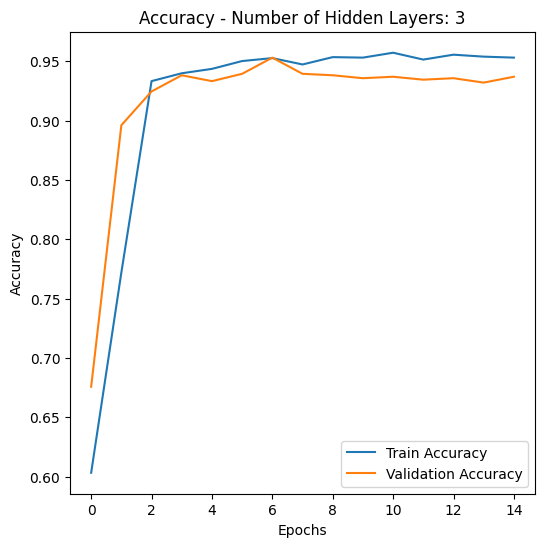


Training Accuracy: 95.30% - Training Error: 4.70%
Testing Accuracy: 93.69% - Testing Error: 6.31%

26/26 [==============================] - 0s 1ms/step

True Positives (TP): 410
True Negatives (TN): 347
False Positives (FP): 27
False Negatives (FN): 24

Confusion Matrix:
        female  male
female     347    27
male        24   410
-------------------------

Number of Hidden Layers: 4

Epoch 1/15
10/10 [==============================] - 2s 30ms/step - loss: 0.6377 - accuracy: 0.5563 - val_loss: 0.5854 - val_accuracy: 0.5371
Epoch 2/15
10/10 [==============================] - 0s 10ms/step - loss: 0.5112 - accuracy: 0.6994 - val_loss: 0.4407 - val_accuracy: 0.8144
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 0.3469 - accuracy: 0.9014 - val_loss: 0.2607 - val_accuracy: 0.9233
Epoch 4/15
10/10 [==============================] - 0s 11ms/step - loss: 0.1992 - accuracy: 0.9419 - val_loss: 0.1505 - val_accuracy: 0.9468
Epoch 5/15
10/10 [============================

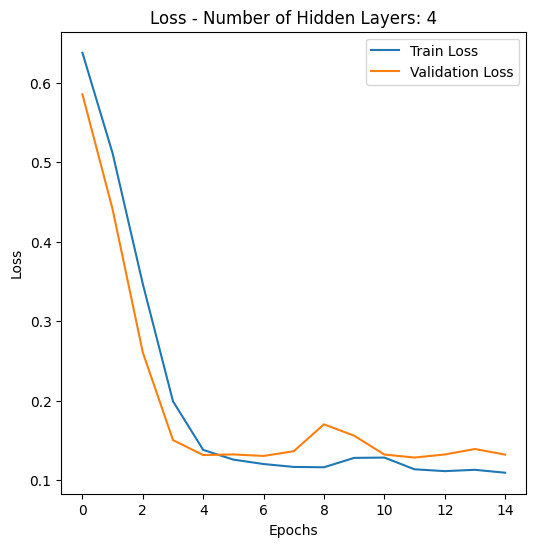

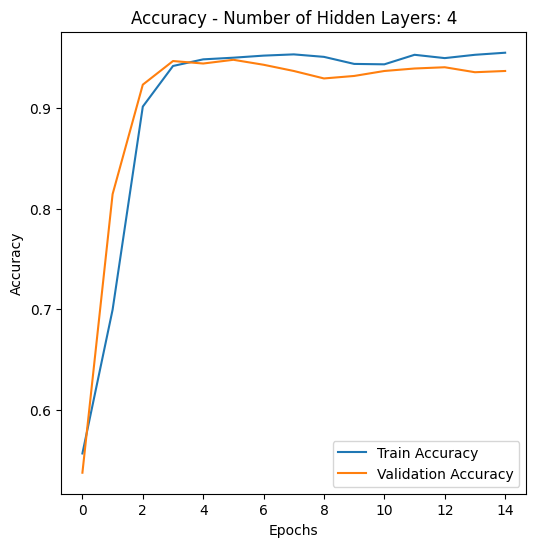


Training Accuracy: 95.51% - Training Error: 4.49%
Testing Accuracy: 93.69% - Testing Error: 6.31%

26/26 [==============================] - 0s 2ms/step

True Positives (TP): 415
True Negatives (TN): 342
False Positives (FP): 32
False Negatives (FN): 19

Confusion Matrix:
        female  male
female     342    32
male        19   415
-------------------------



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

hidden_layers = [2, 3, 4]
experiments = len(hidden_layers)

# Define class labels
class_labels = ["female", "male"]

for i in range(experiments):
    print(f"Number of Hidden Layers: {hidden_layers[i]}\n")

    # Define the model
    model_experiment = tf.keras.Sequential()
    model_experiment.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape))
    for _ in range(hidden_layers[i]):
        model_experiment.add(tf.keras.layers.Dense(units=64, activation='relu'))
    model_experiment.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model
    optimizer_experiment = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_experiment.compile(optimizer=optimizer_experiment,
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    # Fit the model
    history_experiment = model_experiment.fit(X_train, y_train,
                                              validation_data=(X_val, y_val),
                                              batch_size=256,
                                              epochs=15,
                                              verbose=1)

    print("")

    # Plot loss and accuracy graphs
    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['loss'], label="Train Loss")
    plt.plot(history_experiment.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss - Number of Hidden Layers: {hidden_layers[i]}')
    plt.legend()
    plt.show()

    print("")

    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['accuracy'], label="Train Accuracy")
    plt.plot(history_experiment.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy - Number of Hidden Layers: {hidden_layers[i]}')
    plt.legend()
    plt.show()

    print("")

    # Display training and testing accuracy and error
    train_accuracy = history_experiment.history['accuracy'][-1] * 100
    test_accuracy = history_experiment.history['val_accuracy'][-1] * 100
    train_error = (1 - history_experiment.history['accuracy'][-1]) * 100
    test_error = (1 - history_experiment.history['val_accuracy'][-1]) * 100
    print(f"Training Accuracy: {train_accuracy:.2f}% - Training Error: {train_error:.2f}%")
    print(f"Testing Accuracy: {test_accuracy:.2f}% - Testing Error: {test_error:.2f}%\n")

    # Display confusion matrix with counts
    predicted_labels = model_experiment.predict(X_val)
    predicted_labels = [1 if pred >= 0.5 else 0 for pred in predicted_labels]
    cm = confusion_matrix(y_val, predicted_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    print(f"\nTrue Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}\n")
    print(f"Confusion Matrix:")
    print(cm_df)
    print("-------------------------\n")


EXPERIMENT OF 3 DIFFERENT NUMBER UNITS IN HIDDEN LAYER IN THE SAME MODEL : ADIB

NUMBER UNITS HIDDEN LAYER PARAMETER: (32,64,128)

Number of Units in Hidden Layer: 32

Epoch 1/15
10/10 [==============================] - 1s 28ms/step - loss: 0.6057 - accuracy: 0.5645 - val_loss: 0.5908 - val_accuracy: 0.5545
Epoch 2/15
10/10 [==============================] - 0s 6ms/step - loss: 0.5568 - accuracy: 0.5798 - val_loss: 0.5490 - val_accuracy: 0.6040
Epoch 3/15
10/10 [==============================] - 0s 6ms/step - loss: 0.5151 - accuracy: 0.6862 - val_loss: 0.5102 - val_accuracy: 0.7116
Epoch 4/15
10/10 [==============================] - 0s 8ms/step - loss: 0.4759 - accuracy: 0.7678 - val_loss: 0.4713 - val_accuracy: 0.8082
Epoch 5/15
10/10 [==============================] - 0s 8ms/step - loss: 0.4376 - accuracy: 0.8458 - val_loss: 0.4326 - val_accuracy: 0.8552
Epoch 6/15
10/10 [==============================] - 0s 8ms/step - loss: 0.3995 - accuracy: 0.8779 - val_loss: 0.3929 - val_accuracy: 0.8676
Epoch 7/15
10/10 [==============================] - 0s 9ms/step - loss: 0.3593 - accuracy: 0.8948 - val_loss: 0.3491 - val

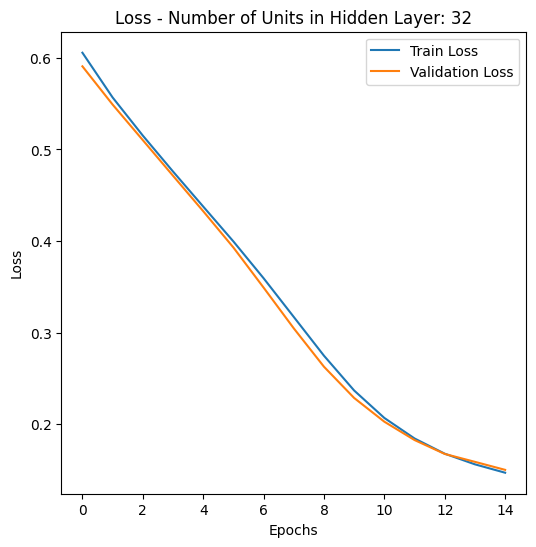

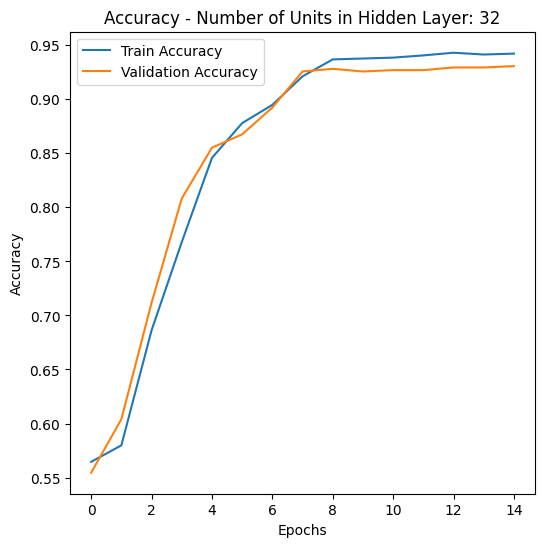


Training Accuracy: 94.23% - Training Error: 5.77%
Testing Accuracy: 93.07% - Testing Error: 6.93%

26/26 [==============================] - 0s 3ms/step

True Positives (TP): 409
True Negatives (TN): 343
False Positives (FP): 31
False Negatives (FN): 25

Confusion Matrix:
        female  male
female     343    31
male        25   409
-------------------------

Number of Units in Hidden Layer: 64

Epoch 1/15
10/10 [==============================] - 2s 37ms/step - loss: 0.6653 - accuracy: 0.6441 - val_loss: 0.6121 - val_accuracy: 0.7463
Epoch 2/15
10/10 [==============================] - 0s 10ms/step - loss: 0.5726 - accuracy: 0.7373 - val_loss: 0.5372 - val_accuracy: 0.7327
Epoch 3/15
10/10 [==============================] - 0s 12ms/step - loss: 0.4945 - accuracy: 0.7872 - val_loss: 0.4587 - val_accuracy: 0.8441
Epoch 4/15
10/10 [==============================] - 0s 11ms/step - loss: 0.4148 - accuracy: 0.8858 - val_loss: 0.3760 - val_accuracy: 0.9121
Epoch 5/15
10/10 [==================

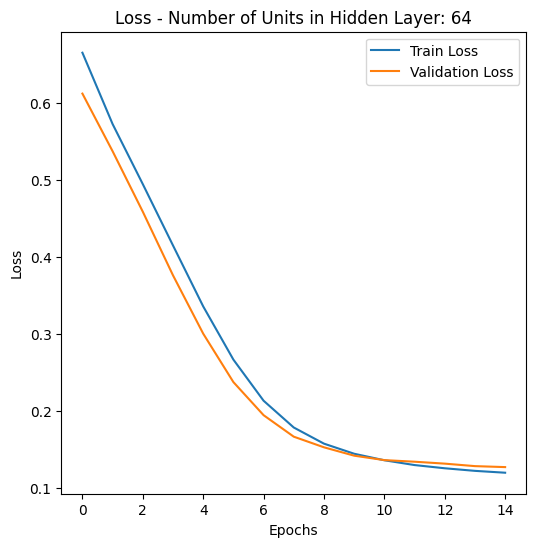

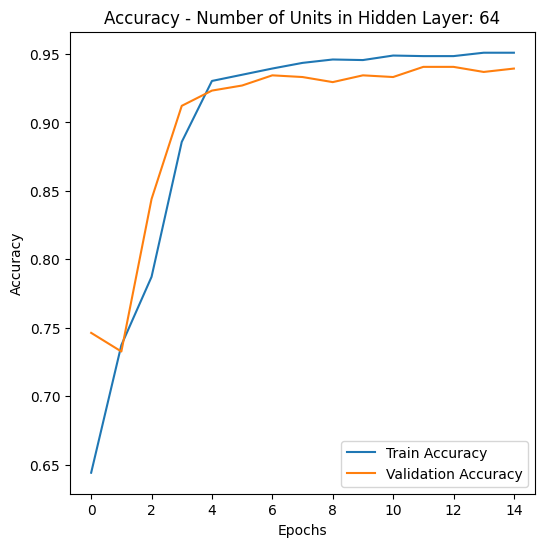


Training Accuracy: 95.09% - Training Error: 4.91%
Testing Accuracy: 93.94% - Testing Error: 6.06%

26/26 [==============================] - 0s 1ms/step

True Positives (TP): 416
True Negatives (TN): 343
False Positives (FP): 31
False Negatives (FN): 18

Confusion Matrix:
        female  male
female     343    31
male        18   416
-------------------------

Number of Units in Hidden Layer: 128

Epoch 1/15
10/10 [==============================] - 1s 29ms/step - loss: 0.6017 - accuracy: 0.5856 - val_loss: 0.5212 - val_accuracy: 0.7067
Epoch 2/15
10/10 [==============================] - 0s 11ms/step - loss: 0.4518 - accuracy: 0.7794 - val_loss: 0.3892 - val_accuracy: 0.8750
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 0.3285 - accuracy: 0.9171 - val_loss: 0.2737 - val_accuracy: 0.9097
Epoch 4/15
10/10 [==============================] - 0s 8ms/step - loss: 0.2326 - accuracy: 0.9373 - val_loss: 0.1999 - val_accuracy: 0.9208
Epoch 5/15
10/10 [==================

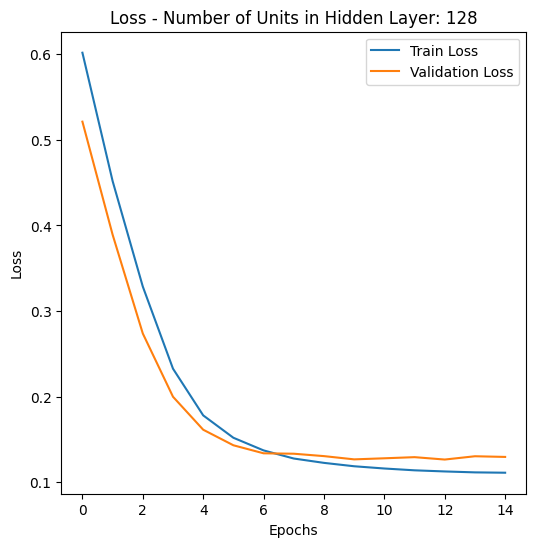

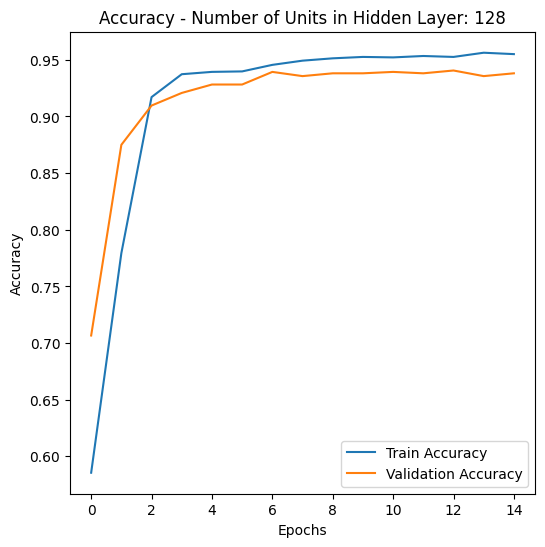


Training Accuracy: 95.51% - Training Error: 4.49%
Testing Accuracy: 93.81% - Testing Error: 6.19%

26/26 [==============================] - 0s 1ms/step

True Positives (TP): 412
True Negatives (TN): 346
False Positives (FP): 28
False Negatives (FN): 22

Confusion Matrix:
        female  male
female     346    28
male        22   412
-------------------------



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

hidden_units = [32, 64, 128]
experiments = len(hidden_units)

# Define class labels
class_labels = ["female", "male"]

for i in range(experiments):
    print(f"Number of Units in Hidden Layer: {hidden_units[i]}\n")

    # Define the model
    model_experiment = tf.keras.Sequential([
        tf.keras.layers.Dense(units=hidden_units[i], activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(units=hidden_units[i], activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model
    optimizer_experiment = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_experiment.compile(optimizer=optimizer_experiment,
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    # Fit the model
    history_experiment = model_experiment.fit(X_train, y_train,
                                              validation_data=(X_val, y_val),
                                              batch_size=256,
                                              epochs=15,
                                              verbose=1)

    print("")

    # Plot loss and accuracy graphs
    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['loss'], label="Train Loss")
    plt.plot(history_experiment.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss - Number of Units in Hidden Layer: {hidden_units[i]}')
    plt.legend()
    plt.show()

    print("")

    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['accuracy'], label="Train Accuracy")
    plt.plot(history_experiment.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy - Number of Units in Hidden Layer: {hidden_units[i]}')
    plt.legend()
    plt.show()

    print("")

    # Display training and testing accuracy and error
    train_accuracy = history_experiment.history['accuracy'][-1] * 100
    test_accuracy = history_experiment.history['val_accuracy'][-1] * 100
    train_error = (1 - history_experiment.history['accuracy'][-1]) * 100
    test_error = (1 - history_experiment.history['val_accuracy'][-1]) * 100
    print(f"Training Accuracy: {train_accuracy:.2f}% - Training Error: {train_error:.2f}%")
    print(f"Testing Accuracy: {test_accuracy:.2f}% - Testing Error: {test_error:.2f}%\n")

    # Display confusion matrix with counts
    predicted_labels = model_experiment.predict(X_val)
    predicted_labels = [1 if pred >= 0.5 else 0 for pred in predicted_labels]
    cm = confusion_matrix(y_val, predicted_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    print(f"\nTrue Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}\n")
    print(f"Confusion Matrix:")
    print(cm_df)
    print("-------------------------\n")


EXPERIMENT OF 3 DIFFERENT ACTIVATION ON HIDDEN LAYER USING THE SAME MODEL : FARHAN

ACTIVATION ON HIDDEN LAYER PARAMETER: ('relu', 'sigmoid', 'tanh')

Activation Function: relu

Epoch 1/15
10/10 [==============================] - 1s 25ms/step - loss: 0.6198 - accuracy: 0.5711 - val_loss: 0.5667 - val_accuracy: 0.6089
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 0.5164 - accuracy: 0.7126 - val_loss: 0.4797 - val_accuracy: 0.7908
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 0.4299 - accuracy: 0.8557 - val_loss: 0.3905 - val_accuracy: 0.8973
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 0.3477 - accuracy: 0.9278 - val_loss: 0.3097 - val_accuracy: 0.9196
Epoch 5/15
10/10 [==============================] - 0s 9ms/step - loss: 0.2771 - accuracy: 0.9303 - val_loss: 0.2426 - val_accuracy: 0.9369
Epoch 6/15
10/10 [==============================] - 0s 6ms/step - loss: 0.2225 - accuracy: 0.9315 - val_loss: 0.1941 - val_accuracy: 0.9431
Epoch 7/15
10/10 [==============================] - 0s 7ms/step - loss: 0.1853 - accuracy: 0.9353 - val_loss: 0.1655 - val_accuracy:

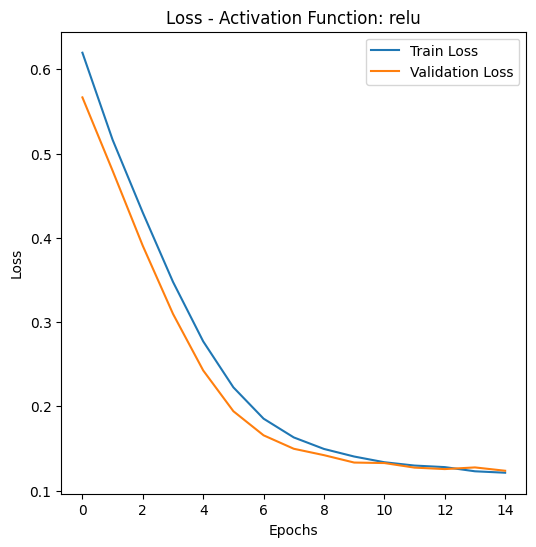

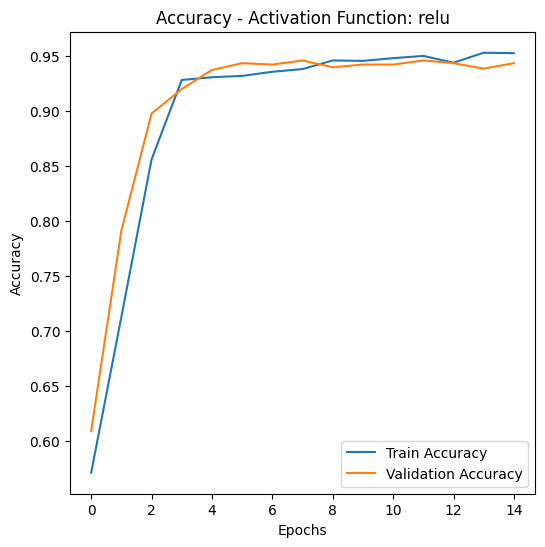


Training Accuracy: 95.22% - Training Error: 4.78%
Testing Accuracy: 94.31% - Testing Error: 5.69%

26/26 [==============================] - 0s 1ms/step

True Positives (TP): 415
True Negatives (TN): 347
False Positives (FP): 27
False Negatives (FN): 19

Confusion Matrix:
        female  male
female     347    27
male        19   415
-------------------------

Activation Function: sigmoid

Epoch 1/15
10/10 [==============================] - 1s 27ms/step - loss: 0.6908 - accuracy: 0.5563 - val_loss: 0.6849 - val_accuracy: 0.5371
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 0.6777 - accuracy: 0.5563 - val_loss: 0.6740 - val_accuracy: 0.5371
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 0.6639 - accuracy: 0.5563 - val_loss: 0.6606 - val_accuracy: 0.5371
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 0.6487 - accuracy: 0.5563 - val_loss: 0.6441 - val_accuracy: 0.5371
Epoch 5/15
10/10 [============================

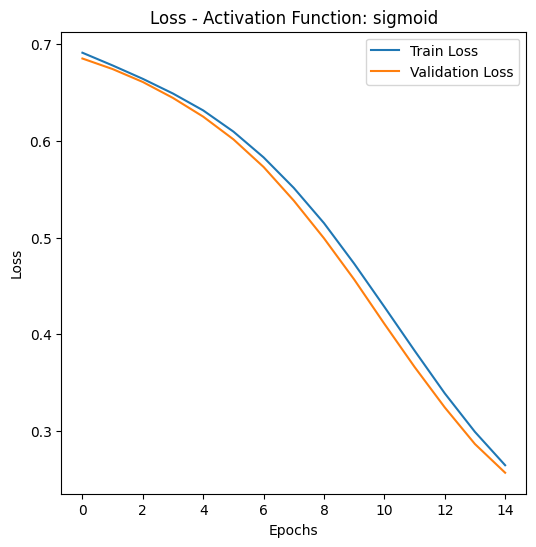

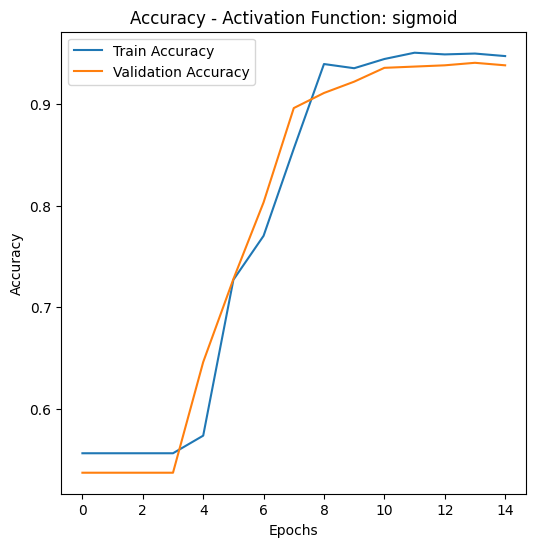


Training Accuracy: 94.72% - Training Error: 5.28%
Testing Accuracy: 93.81% - Testing Error: 6.19%

26/26 [==============================] - 0s 3ms/step

True Positives (TP): 419
True Negatives (TN): 339
False Positives (FP): 35
False Negatives (FN): 15

Confusion Matrix:
        female  male
female     339    35
male        15   419
-------------------------

Activation Function: tanh

Epoch 1/15
10/10 [==============================] - 2s 37ms/step - loss: 0.6168 - accuracy: 0.5724 - val_loss: 0.5560 - val_accuracy: 0.5866
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 0.4871 - accuracy: 0.7394 - val_loss: 0.4446 - val_accuracy: 0.7958
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 0.3905 - accuracy: 0.8623 - val_loss: 0.3596 - val_accuracy: 0.9072
Epoch 4/15
10/10 [==============================] - 0s 13ms/step - loss: 0.3176 - accuracy: 0.9192 - val_loss: 0.2967 - val_accuracy: 0.9059
Epoch 5/15
10/10 [==============================

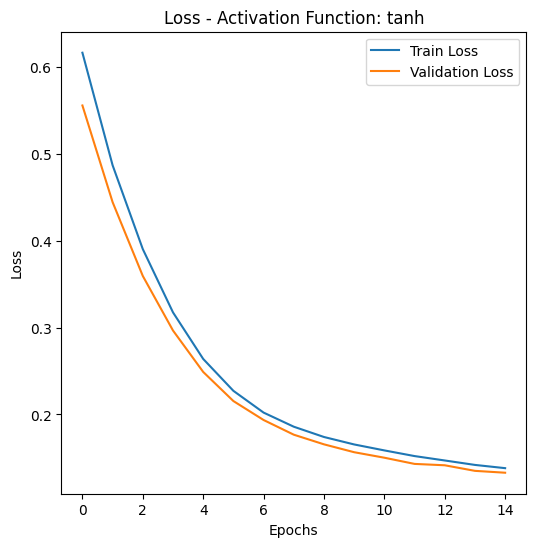

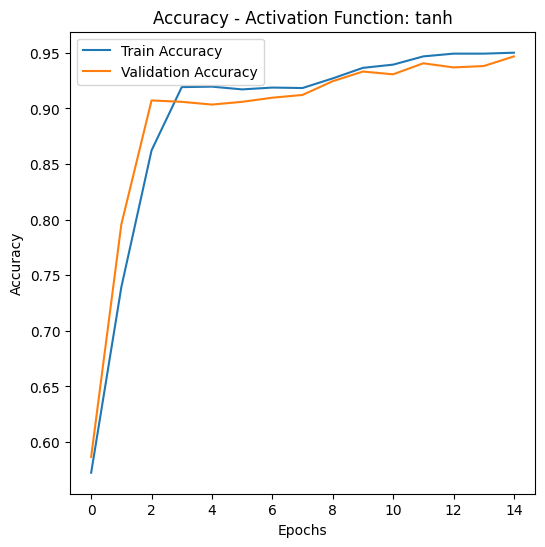


Training Accuracy: 95.01% - Training Error: 4.99%
Testing Accuracy: 94.68% - Testing Error: 5.32%

26/26 [==============================] - 0s 1ms/step

True Positives (TP): 419
True Negatives (TN): 346
False Positives (FP): 28
False Negatives (FN): 15

Confusion Matrix:
        female  male
female     346    28
male        15   419
-------------------------



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

activations = ['relu', 'sigmoid', 'tanh']
experiments = len(activations)

# Define class labels
class_labels = ["female", "male"]

for i in range(experiments):
    print(f"Activation Function: {activations[i]}\n")

    # Define the model
    model_experiment = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation=activations[i], input_shape=input_shape),
        tf.keras.layers.Dense(units=64, activation=activations[i]),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model
    optimizer_experiment = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_experiment.compile(optimizer=optimizer_experiment,
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    # Fit the model
    history_experiment = model_experiment.fit(X_train, y_train,
                                              validation_data=(X_val, y_val),
                                              batch_size=256,
                                              epochs=15,
                                              verbose=1)

    print("")

    # Plot loss and accuracy graphs
    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['loss'], label="Train Loss")
    plt.plot(history_experiment.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss - Activation Function: {activations[i]}')
    plt.legend()
    plt.show()

    print("")

    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['accuracy'], label="Train Accuracy")
    plt.plot(history_experiment.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy - Activation Function: {activations[i]}')
    plt.legend()
    plt.show()

    print("")

    # Display training and testing accuracy and error
    train_accuracy = history_experiment.history['accuracy'][-1] * 100
    test_accuracy = history_experiment.history['val_accuracy'][-1] * 100
    train_error = (1 - history_experiment.history['accuracy'][-1]) * 100
    test_error = (1 - history_experiment.history['val_accuracy'][-1]) * 100
    print(f"Training Accuracy: {train_accuracy:.2f}% - Training Error: {train_error:.2f}%")
    print(f"Testing Accuracy: {test_accuracy:.2f}% - Testing Error: {test_error:.2f}%\n")

    # Display confusion matrix with counts
    predicted_labels = model_experiment.predict(X_val)
    predicted_labels = [1 if pred >= 0.5 else 0 for pred in predicted_labels]
    cm = confusion_matrix(y_val, predicted_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    print(f"\nTrue Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}\n")
    print(f"Confusion Matrix:")
    print(cm_df)
    print("-------------------------\n")


EXPERIMENT OF 3 DIFFERENT LEARNING RATE USING THE SAME MODEL : AFIFI

LEARNING RATE PARAMETER: (0.001, 0.01, 0.1)

Learning Rate: 0.0010

Epoch 1/15
10/10 [==============================] - 1s 29ms/step - loss: 0.6082 - accuracy: 0.6049 - val_loss: 0.5670 - val_accuracy: 0.6584
Epoch 2/15
10/10 [==============================] - 0s 8ms/step - loss: 0.5203 - accuracy: 0.7311 - val_loss: 0.4893 - val_accuracy: 0.7463
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 0.4406 - accuracy: 0.8223 - val_loss: 0.4112 - val_accuracy: 0.8527
Epoch 4/15
10/10 [==============================] - 0s 9ms/step - loss: 0.3646 - accuracy: 0.9027 - val_loss: 0.3366 - val_accuracy: 0.9196
Epoch 5/15
10/10 [==============================] - 0s 7ms/step - loss: 0.2968 - accuracy: 0.9274 - val_loss: 0.2733 - val_accuracy: 0.9270
Epoch 6/15
10/10 [==============================] - 0s 7ms/step - loss: 0.2411 - accuracy: 0.9344 - val_loss: 0.2238 - val_accuracy: 0.9381
Epoch 7/15
10/10 [==============================] - 0s 9ms/step - loss: 0.2000 - accuracy: 0.9406 - val_loss: 0.1886 - val_accuracy: 0.9

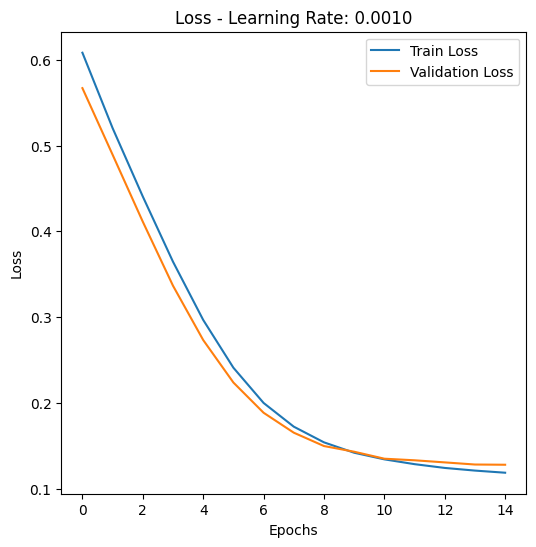

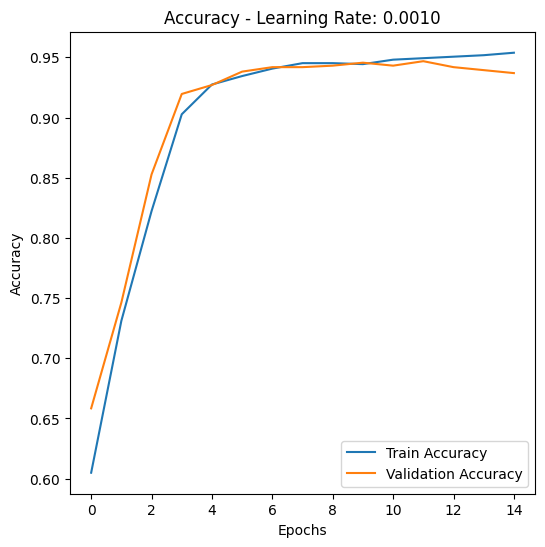


Training Accuracy: 95.38% - Training Error: 4.62%
Testing Accuracy: 93.69% - Testing Error: 6.31%

26/26 [==============================] - 0s 1ms/step

True Positives (TP): 412
True Negatives (TN): 345
False Positives (FP): 29
False Negatives (FN): 22

Confusion Matrix:
        female  male
female     345    29
male        22   412
-------------------------

Learning Rate: 0.0100

Epoch 1/15
10/10 [==============================] - 1s 28ms/step - loss: 0.4240 - accuracy: 0.7497 - val_loss: 0.1933 - val_accuracy: 0.9282
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 0.1615 - accuracy: 0.9353 - val_loss: 0.1373 - val_accuracy: 0.9406
Epoch 3/15
10/10 [==============================] - 0s 7ms/step - loss: 0.1341 - accuracy: 0.9489 - val_loss: 0.1254 - val_accuracy: 0.9480
Epoch 4/15
10/10 [==============================] - 0s 7ms/step - loss: 0.1232 - accuracy: 0.9497 - val_loss: 0.1349 - val_accuracy: 0.9418
Epoch 5/15
10/10 [==============================] - 0

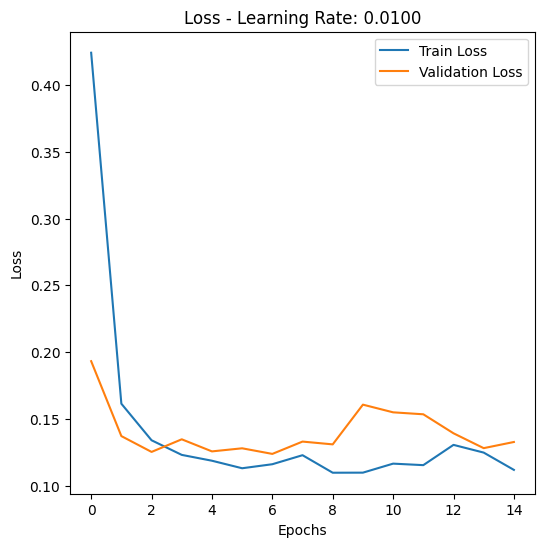

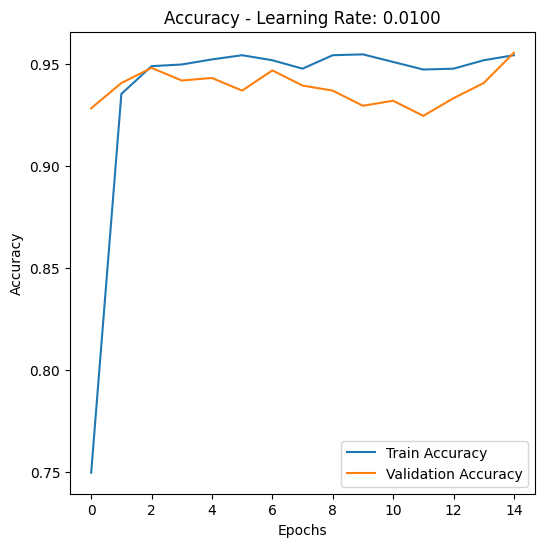


Training Accuracy: 95.42% - Training Error: 4.58%
Testing Accuracy: 95.54% - Testing Error: 4.46%

26/26 [==============================] - 0s 2ms/step

True Positives (TP): 407
True Negatives (TN): 365
False Positives (FP): 9
False Negatives (FN): 27

Confusion Matrix:
        female  male
female     365     9
male        27   407
-------------------------

Learning Rate: 0.1000

Epoch 1/15
10/10 [==============================] - 1s 30ms/step - loss: 1.0368 - accuracy: 0.7010 - val_loss: 0.2436 - val_accuracy: 0.9134
Epoch 2/15
10/10 [==============================] - 0s 10ms/step - loss: 0.1998 - accuracy: 0.9315 - val_loss: 0.1524 - val_accuracy: 0.9455
Epoch 3/15
10/10 [==============================] - 0s 10ms/step - loss: 0.1360 - accuracy: 0.9452 - val_loss: 0.1560 - val_accuracy: 0.9480
Epoch 4/15
10/10 [==============================] - 0s 13ms/step - loss: 0.1393 - accuracy: 0.9427 - val_loss: 0.1419 - val_accuracy: 0.9332
Epoch 5/15
10/10 [==============================] -

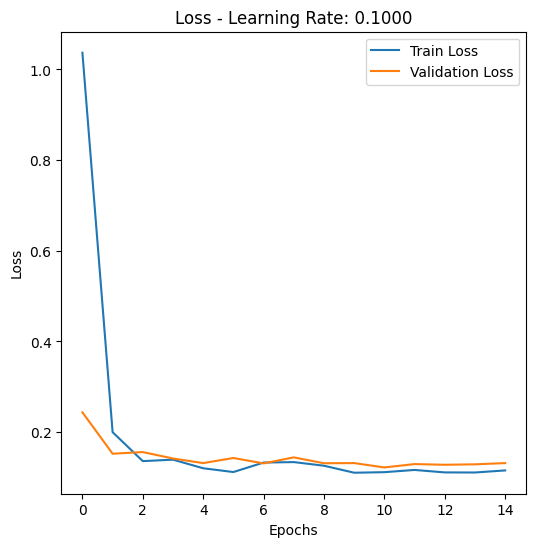

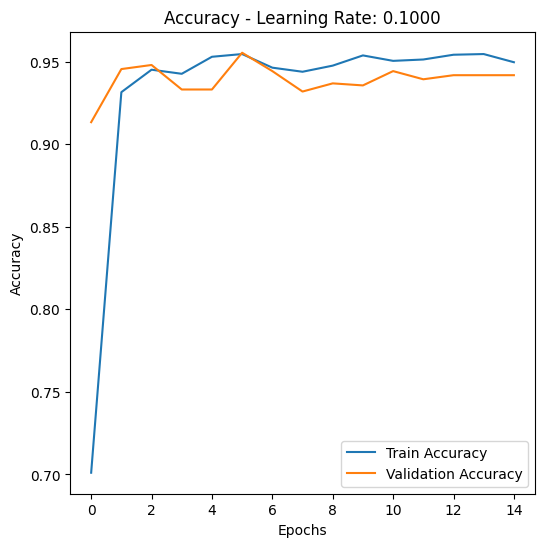


Training Accuracy: 94.97% - Training Error: 5.03%
Testing Accuracy: 94.18% - Testing Error: 5.82%

26/26 [==============================] - 0s 2ms/step

True Positives (TP): 408
True Negatives (TN): 353
False Positives (FP): 21
False Negatives (FN): 26

Confusion Matrix:
        female  male
female     353    21
male        26   408
-------------------------



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

learning_rates = [0.001, 0.01, 0.1]
experiments = len(learning_rates)

# Define class labels
class_labels = ["female", "male"]

for i in range(experiments):
    print(f"Learning Rate: {learning_rates[i]:.4f}\n")

    # Define the model
    model_experiment = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model with the current learning rate
    optimizer_experiment = tf.keras.optimizers.Adam(learning_rate=learning_rates[i])
    model_experiment.compile(optimizer=optimizer_experiment,
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    # Fit the model
    history_experiment = model_experiment.fit(X_train, y_train,
                                              validation_data=(X_val, y_val),
                                              batch_size=256,
                                              epochs=15,
                                              verbose=1)

    print("")

    # Plot loss and accuracy graphs
    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['loss'], label="Train Loss")
    plt.plot(history_experiment.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss - Learning Rate: {learning_rates[i]:.4f}')
    plt.legend()
    plt.show()

    print("")

    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['accuracy'], label="Train Accuracy")
    plt.plot(history_experiment.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy - Learning Rate: {learning_rates[i]:.4f}')
    plt.legend()
    plt.show()

    print("")

    # Display training and testing accuracy and error
    train_accuracy = history_experiment.history['accuracy'][-1] * 100
    test_accuracy = history_experiment.history['val_accuracy'][-1] * 100
    train_error = (1 - history_experiment.history['accuracy'][-1]) * 100
    test_error = (1 - history_experiment.history['val_accuracy'][-1]) * 100
    print(f"Training Accuracy: {train_accuracy:.2f}% - Training Error: {train_error:.2f}%")
    print(f"Testing Accuracy: {test_accuracy:.2f}% - Testing Error: {test_error:.2f}%\n")

    # Display confusion matrix with counts
    predicted_labels = model_experiment.predict(X_val)
    predicted_labels = [1 if pred >= 0.5 else 0 for pred in predicted_labels]
    cm = confusion_matrix(y_val, predicted_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    print(f"\nTrue Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}\n")
    print(f"Confusion Matrix:")
    print(cm_df)
    print("-------------------------\n")


EXPERIMENT OF 3 DIFFERENT BATCH SIZE USING THE SAME MODEL : DARWISH

BATCH SIZE PARAMETER: (128, 256, 512)

Batch Size: 128

Epoch 1/15
19/19 [==============================] - 1s 14ms/step - loss: 0.5403 - accuracy: 0.6491 - val_loss: 0.4860 - val_accuracy: 0.7129
Epoch 2/15
19/19 [==============================] - 0s 4ms/step - loss: 0.4087 - accuracy: 0.8342 - val_loss: 0.3543 - val_accuracy: 0.8998
Epoch 3/15
19/19 [==============================] - 0s 5ms/step - loss: 0.2880 - accuracy: 0.9171 - val_loss: 0.2402 - val_accuracy: 0.9356
Epoch 4/15
19/19 [==============================] - 0s 5ms/step - loss: 0.2022 - accuracy: 0.9460 - val_loss: 0.1747 - val_accuracy: 0.9418
Epoch 5/15
19/19 [==============================] - 0s 5ms/step - loss: 0.1592 - accuracy: 0.9468 - val_loss: 0.1445 - val_accuracy: 0.9418
Epoch 6/15
19/19 [==============================] - 0s 6ms/step - loss: 0.1407 - accuracy: 0.9485 - val_loss: 0.1337 - val_accuracy: 0.9455
Epoch 7/15
19/19 [==============================] - 0s 5ms/step - loss: 0.1306 - accuracy: 0.9485 - val_loss: 0.1253 - val_accuracy: 0.9480
Ep

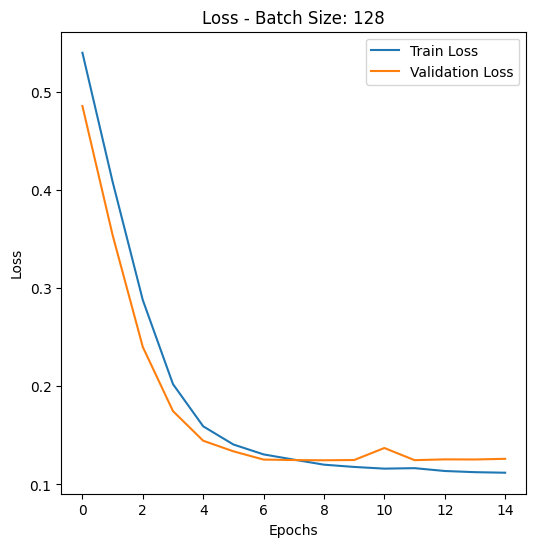

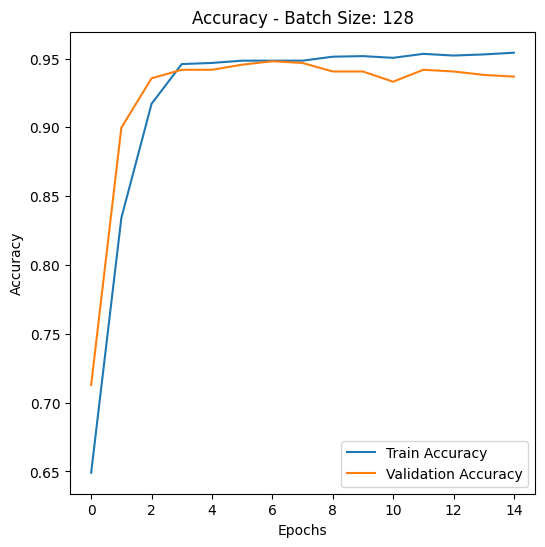


Training Accuracy: 95.42% - Training Error: 4.58%
Testing Accuracy: 93.69% - Testing Error: 6.31%

26/26 [==============================] - 0s 1ms/step

True Positives (TP): 415
True Negatives (TN): 342
False Positives (FP): 32
False Negatives (FN): 19

Confusion Matrix:
        female  male
female     342    32
male        19   415
-------------------------

Batch Size: 256

Epoch 1/15
10/10 [==============================] - 1s 26ms/step - loss: 0.6154 - accuracy: 0.8012 - val_loss: 0.5617 - val_accuracy: 0.7413
Epoch 2/15
10/10 [==============================] - 0s 7ms/step - loss: 0.5226 - accuracy: 0.7649 - val_loss: 0.4862 - val_accuracy: 0.7921
Epoch 3/15
10/10 [==============================] - 0s 8ms/step - loss: 0.4450 - accuracy: 0.8511 - val_loss: 0.4066 - val_accuracy: 0.8787
Epoch 4/15
10/10 [==============================] - 0s 6ms/step - loss: 0.3684 - accuracy: 0.9068 - val_loss: 0.3303 - val_accuracy: 0.9183
Epoch 5/15
10/10 [==============================] - 0s 8ms/

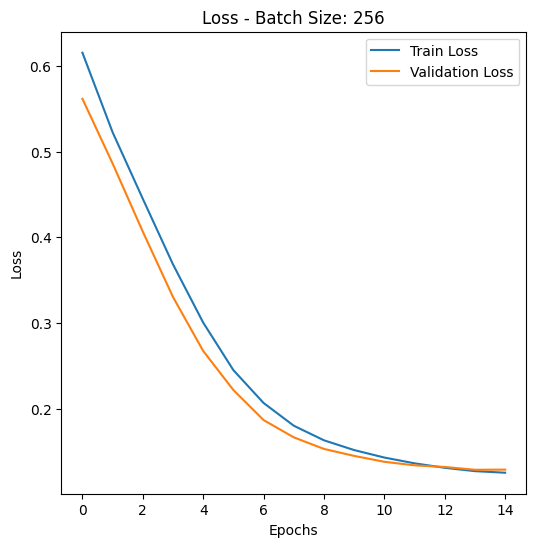

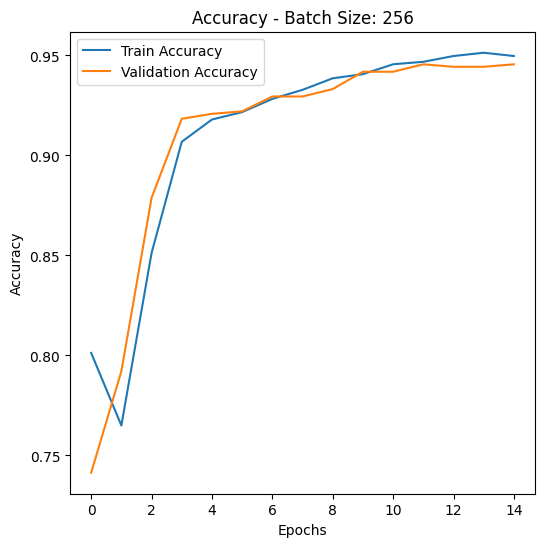


Training Accuracy: 94.97% - Training Error: 5.03%
Testing Accuracy: 94.55% - Testing Error: 5.45%

26/26 [==============================] - 0s 2ms/step

True Positives (TP): 416
True Negatives (TN): 348
False Positives (FP): 26
False Negatives (FN): 18

Confusion Matrix:
        female  male
female     348    26
male        18   416
-------------------------

Batch Size: 512

Epoch 1/15
5/5 [==============================] - 1s 57ms/step - loss: 0.6575 - accuracy: 0.7076 - val_loss: 0.6252 - val_accuracy: 0.6869
Epoch 2/15
5/5 [==============================] - 0s 14ms/step - loss: 0.6053 - accuracy: 0.6829 - val_loss: 0.5843 - val_accuracy: 0.6819
Epoch 3/15
5/5 [==============================] - 0s 20ms/step - loss: 0.5640 - accuracy: 0.7027 - val_loss: 0.5489 - val_accuracy: 0.7054
Epoch 4/15
5/5 [==============================] - 0s 15ms/step - loss: 0.5270 - accuracy: 0.7419 - val_loss: 0.5132 - val_accuracy: 0.7686
Epoch 5/15
5/5 [==============================] - 0s 13ms/step -

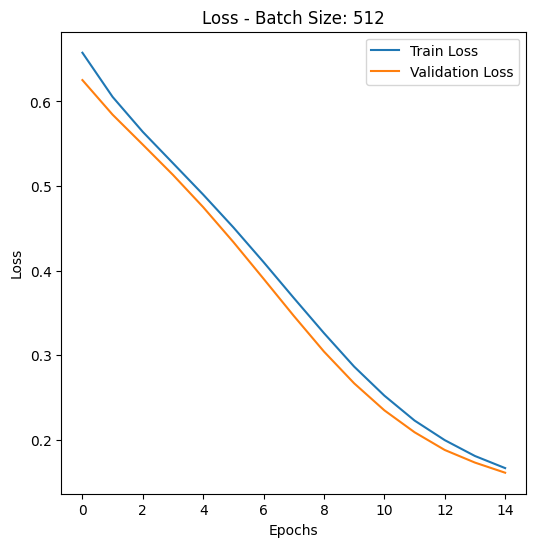

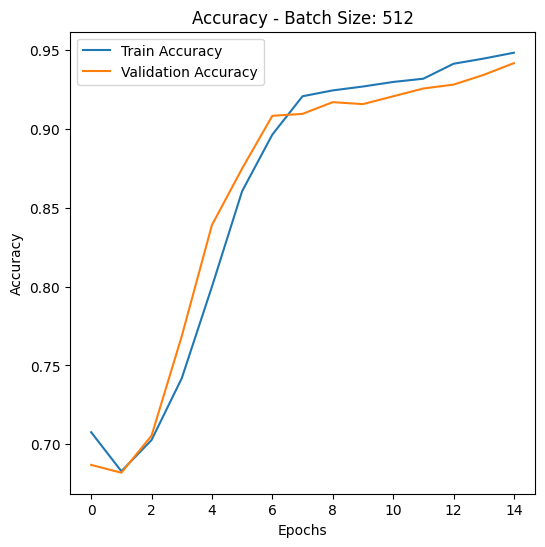


Training Accuracy: 94.85% - Training Error: 5.15%
Testing Accuracy: 94.18% - Testing Error: 5.82%

26/26 [==============================] - 0s 3ms/step

True Positives (TP): 410
True Negatives (TN): 351
False Positives (FP): 23
False Negatives (FN): 24

Confusion Matrix:
        female  male
female     351    23
male        24   410
-------------------------



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

batch_sizes = [128, 256, 512]
experiments = len(batch_sizes)

# Define class labels
class_labels = ["female", "male"]

for i in range(experiments):
    print(f"Batch Size: {batch_sizes[i]}\n")

    # Define the model
    model_experiment = tf.keras.Sequential([
        tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape),
        tf.keras.layers.Dense(units=64, activation='relu'),
        tf.keras.layers.Dense(units=1, activation='sigmoid')
    ])

    # Compile the model
    optimizer_experiment = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_experiment.compile(optimizer=optimizer_experiment,
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    # Fit the model
    history_experiment = model_experiment.fit(X_train, y_train,
                                              validation_data=(X_val, y_val),
                                              batch_size=batch_sizes[i],
                                              epochs=15,
                                              verbose=1)

    print("")

    # Plot loss and accuracy graphs
    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['loss'], label="Train Loss")
    plt.plot(history_experiment.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss - Batch Size: {batch_sizes[i]}')
    plt.legend()
    plt.show()

    print("")

    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['accuracy'], label="Train Accuracy")
    plt.plot(history_experiment.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy - Batch Size: {batch_sizes[i]}')
    plt.legend()
    plt.show()

    print("")

    # Display training and testing accuracy and error
    train_accuracy = history_experiment.history['accuracy'][-1] * 100
    test_accuracy = history_experiment.history['val_accuracy'][-1] * 100
    train_error = (1 - history_experiment.history['accuracy'][-1]) * 100
    test_error = (1 - history_experiment.history['val_accuracy'][-1]) * 100
    print(f"Training Accuracy: {train_accuracy:.2f}% - Training Error: {train_error:.2f}%")
    print(f"Testing Accuracy: {test_accuracy:.2f}% - Testing Error: {test_error:.2f}%\n")

    # Display confusion matrix with counts
    predicted_labels = model_experiment.predict(X_val)
    predicted_labels = [1 if pred >= 0.5 else 0 for pred in predicted_labels]
    cm = confusion_matrix(y_val, predicted_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    print(f"\nTrue Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}\n")
    print(f"Confusion Matrix:")
    print(cm_df)
    print("-------------------------\n")


EXPERIMENT OF 3 DIFFERENT NUMBER OF EPOCH USING THE SAME MODEL : ILHAM

NUMBER EPOCH PARAMETER: (10, 15, 20)

Number of Epochs: 10

Epoch 1/10
10/10 [==============================] - 2s 42ms/step - loss: 0.7641 - accuracy: 0.3225 - val_loss: 0.6987 - val_accuracy: 0.5545
Epoch 2/10
10/10 [==============================] - 0s 11ms/step - loss: 0.6602 - accuracy: 0.7897 - val_loss: 0.6185 - val_accuracy: 0.8527
Epoch 3/10
10/10 [==============================] - 0s 13ms/step - loss: 0.5817 - accuracy: 0.8726 - val_loss: 0.5443 - val_accuracy: 0.8787
Epoch 4/10
10/10 [==============================] - 0s 9ms/step - loss: 0.5036 - accuracy: 0.9163 - val_loss: 0.4620 - val_accuracy: 0.9245
Epoch 5/10
10/10 [==============================] - 0s 11ms/step - loss: 0.4172 - accuracy: 0.9357 - val_loss: 0.3705 - val_accuracy: 0.9245
Epoch 6/10
10/10 [==============================] - 0s 11ms/step - loss: 0.3271 - accuracy: 0.9390 - val_loss: 0.2836 - val_accuracy: 0.9233
Epoch 7/10
10/10 [==============================] - 0s 13ms/step - loss: 0.2518 - accuracy: 0.9357 - val_loss: 0.2183 - val_accuracy:

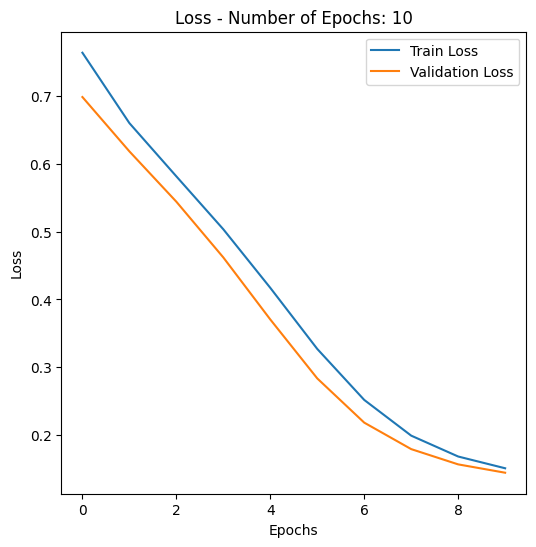

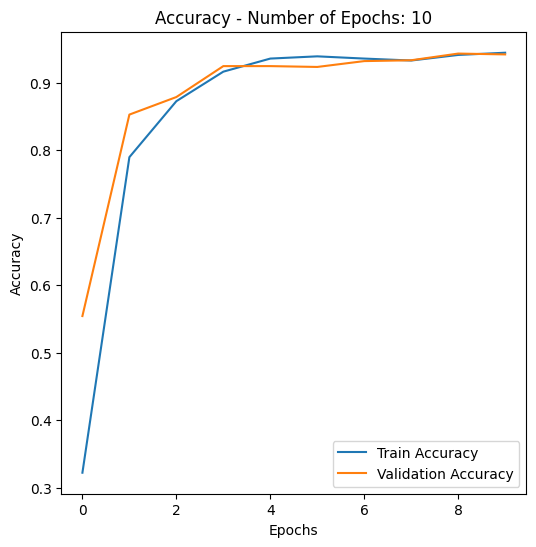


Training Accuracy: 94.43% - Training Error: 5.57%
Testing Accuracy: 94.18% - Testing Error: 5.82%

26/26 [==============================] - 0s 1ms/step

True Positives (TP): 408
True Negatives (TN): 353
False Positives (FP): 21
False Negatives (FN): 26

Confusion Matrix:
        female  male
female     353    21
male        26   408
-------------------------

Number of Epochs: 15

Epoch 1/15
10/10 [==============================] - 1s 29ms/step - loss: 0.6299 - accuracy: 0.7489 - val_loss: 0.5807 - val_accuracy: 0.7550
Epoch 2/15
10/10 [==============================] - 0s 9ms/step - loss: 0.5308 - accuracy: 0.7909 - val_loss: 0.5096 - val_accuracy: 0.7884
Epoch 3/15
10/10 [==============================] - 0s 9ms/step - loss: 0.4581 - accuracy: 0.8256 - val_loss: 0.4368 - val_accuracy: 0.8094
Epoch 4/15
10/10 [==============================] - 0s 9ms/step - loss: 0.3835 - accuracy: 0.8569 - val_loss: 0.3635 - val_accuracy: 0.8738
Epoch 5/15
10/10 [==============================] - 0s

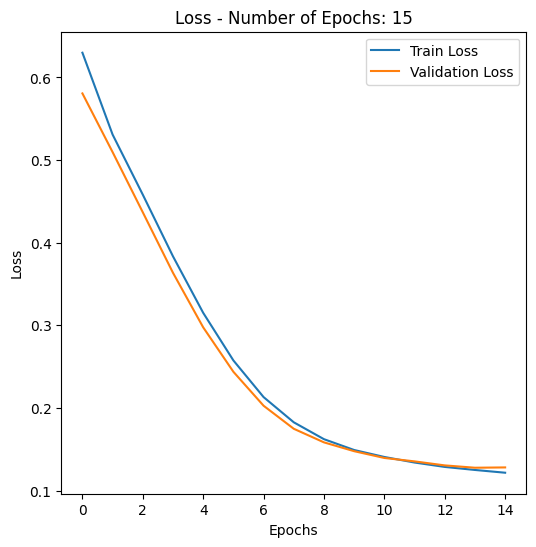

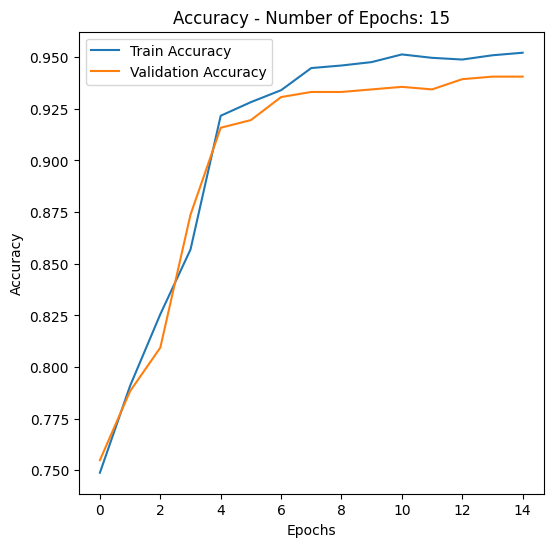


Training Accuracy: 95.22% - Training Error: 4.78%
Testing Accuracy: 94.06% - Testing Error: 5.94%

26/26 [==============================] - 0s 2ms/step

True Positives (TP): 417
True Negatives (TN): 343
False Positives (FP): 31
False Negatives (FN): 17

Confusion Matrix:
        female  male
female     343    31
male        17   417
-------------------------

Number of Epochs: 20

Epoch 1/20
10/10 [==============================] - 1s 26ms/step - loss: 0.6557 - accuracy: 0.7052 - val_loss: 0.5917 - val_accuracy: 0.7562
Epoch 2/20
10/10 [==============================] - 0s 6ms/step - loss: 0.5434 - accuracy: 0.7753 - val_loss: 0.5015 - val_accuracy: 0.8119
Epoch 3/20
10/10 [==============================] - 0s 8ms/step - loss: 0.4529 - accuracy: 0.8722 - val_loss: 0.4131 - val_accuracy: 0.8948
Epoch 4/20
10/10 [==============================] - 0s 8ms/step - loss: 0.3661 - accuracy: 0.9085 - val_loss: 0.3278 - val_accuracy: 0.8998
Epoch 5/20
10/10 [==============================] - 0s

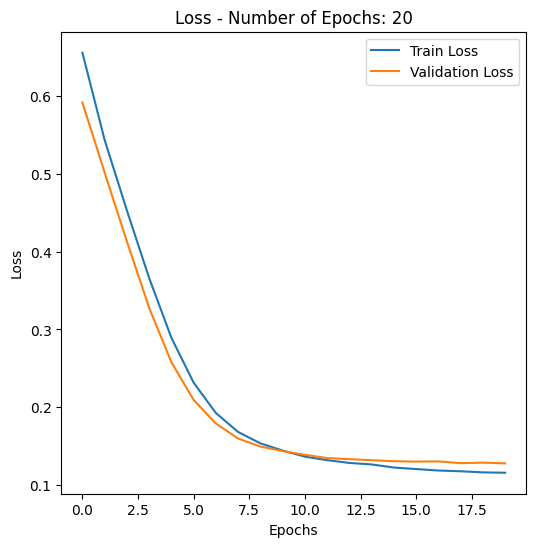

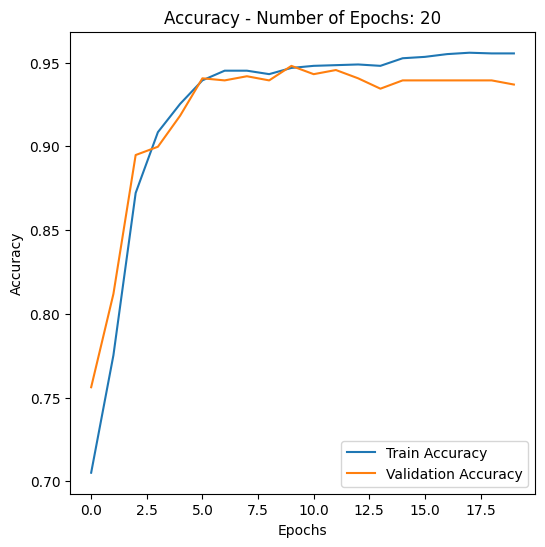


Training Accuracy: 95.55% - Training Error: 4.45%
Testing Accuracy: 93.69% - Testing Error: 6.31%

26/26 [==============================] - 0s 2ms/step

True Positives (TP): 410
True Negatives (TN): 347
False Positives (FP): 27
False Negatives (FN): 24

Confusion Matrix:
        female  male
female     347    27
male        24   410
-------------------------



In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

num_epochs = [10, 15, 20]
experiments = len(num_epochs)

# Define class labels
class_labels = ["female", "male"]

for i in range(experiments):
    print(f"Number of Epochs: {num_epochs[i]}\n")

    # Define the model
    model_experiment = tf.keras.Sequential()
    model_experiment.add(tf.keras.layers.Dense(units=64, activation='relu', input_shape=input_shape))
    model_experiment.add(tf.keras.layers.Dense(units=64, activation='relu'))
    model_experiment.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

    # Compile the model
    optimizer_experiment = tf.keras.optimizers.Adam(learning_rate=0.001)
    model_experiment.compile(optimizer=optimizer_experiment,
                             loss='binary_crossentropy',
                             metrics=['accuracy'])

    # Fit the model
    history_experiment = model_experiment.fit(X_train, y_train,
                                              validation_data=(X_val, y_val),
                                              batch_size=256,
                                              epochs=num_epochs[i],
                                              verbose=1)

    print("")

    # Plot loss and accuracy graphs
    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['loss'], label="Train Loss")
    plt.plot(history_experiment.history['val_loss'], label="Validation Loss")
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Loss - Number of Epochs: {num_epochs[i]}')
    plt.legend()
    plt.show()

    print("")

    plt.figure(figsize=(6, 6))
    plt.plot(history_experiment.history['accuracy'], label="Train Accuracy")
    plt.plot(history_experiment.history['val_accuracy'], label="Validation Accuracy")
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Accuracy - Number of Epochs: {num_epochs[i]}')
    plt.legend()
    plt.show()

    print("")

    # Display training and testing accuracy and error
    train_accuracy = history_experiment.history['accuracy'][-1] * 100
    test_accuracy = history_experiment.history['val_accuracy'][-1] * 100
    train_error = (1 - history_experiment.history['accuracy'][-1]) * 100
    test_error = (1 - history_experiment.history['val_accuracy'][-1]) * 100
    print(f"Training Accuracy: {train_accuracy:.2f}% - Training Error: {train_error:.2f}%")
    print(f"Testing Accuracy: {test_accuracy:.2f}% - Testing Error: {test_error:.2f}%\n")

    # Display confusion matrix with counts
    predicted_labels = model_experiment.predict(X_val)
    predicted_labels = [1 if pred >= 0.5 else 0 for pred in predicted_labels]
    cm = confusion_matrix(y_val, predicted_labels)
    cm_df = pd.DataFrame(cm, index=class_labels, columns=class_labels)

    TP = cm[1, 1]
    TN = cm[0, 0]
    FP = cm[0, 1]
    FN = cm[1, 0]

    print(f"\nTrue Positives (TP): {TP}")
    print(f"True Negatives (TN): {TN}")
    print(f"False Positives (FP): {FP}")
    print(f"False Negatives (FN): {FN}\n")
    print(f"Confusion Matrix:")
    print(cm_df)
    print("-------------------------\n")
